In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [100]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [65]:
from sklearn.linear_model import LinearRegression 
from sklearn.ensemble import RandomForestRegressor 


# 1. EDA

In [3]:
pd.pandas.set_option('display.max_columns', None) ## displays all the columns

In [4]:
df = pd.read_csv('train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
## Different data types in the data frame
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

## Three data types
1. Numerical - int and float
2. Categorical
3. Data/Time

In [6]:
## shape of the df
df.shape

(1460, 81)

In [7]:
##missing values ?
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [8]:
pd.pandas.set_option("display.max_rows", None) ## to display all the rows

In [9]:
df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType        872
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [10]:
## there are a lot of missing values for certain columns
##get all the columns which have missing values
col_with_miss_values  = [col for col in df.columns if df[col].isnull().sum() >0]
col_with_miss_values

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [11]:
##get the percentage of missing values in each column
for col in col_with_miss_values:
    missing_value = np.round((df[col].isnull().sum()/ df[col].size)*100, 2)
    print(f"The percentage of missing values in {col} is ........... {missing_value} %")

The percentage of missing values in LotFrontage is ........... 17.74 %
The percentage of missing values in Alley is ........... 93.77 %
The percentage of missing values in MasVnrType is ........... 59.73 %
The percentage of missing values in MasVnrArea is ........... 0.55 %
The percentage of missing values in BsmtQual is ........... 2.53 %
The percentage of missing values in BsmtCond is ........... 2.53 %
The percentage of missing values in BsmtExposure is ........... 2.6 %
The percentage of missing values in BsmtFinType1 is ........... 2.53 %
The percentage of missing values in BsmtFinType2 is ........... 2.6 %
The percentage of missing values in Electrical is ........... 0.07 %
The percentage of missing values in FireplaceQu is ........... 47.26 %
The percentage of missing values in GarageType is ........... 5.55 %
The percentage of missing values in GarageYrBlt is ........... 5.55 %
The percentage of missing values in GarageFinish is ........... 5.55 %
The percentage of missing valu

### Alley, MasVnrType, FireplaceQu, PoolQC, Fence and MiscFeatures are NA , they have more than 50% of missing values and need to be checked

#### since there are too many missing values in missing features , understand if missing values contributes to the Sales Price. To decide on imputing the features whether to delete or give an arbitrary value

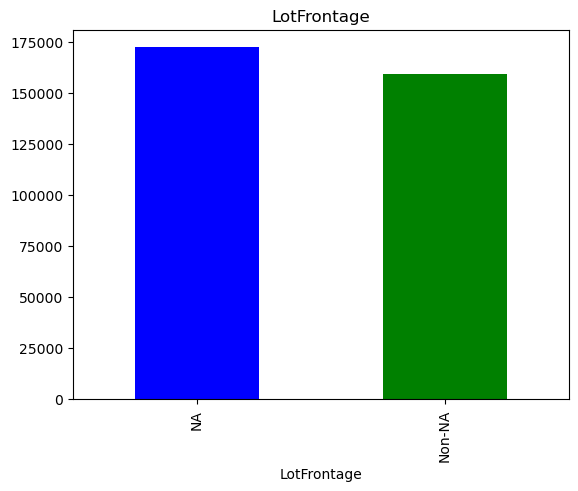

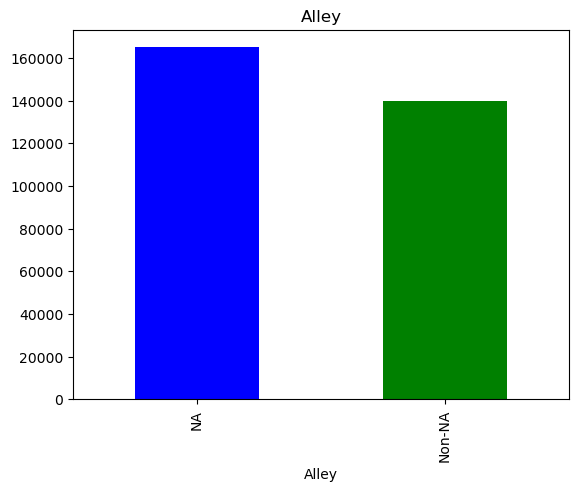

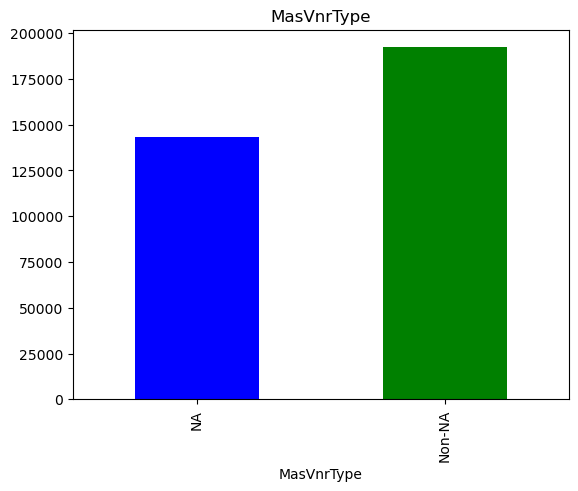

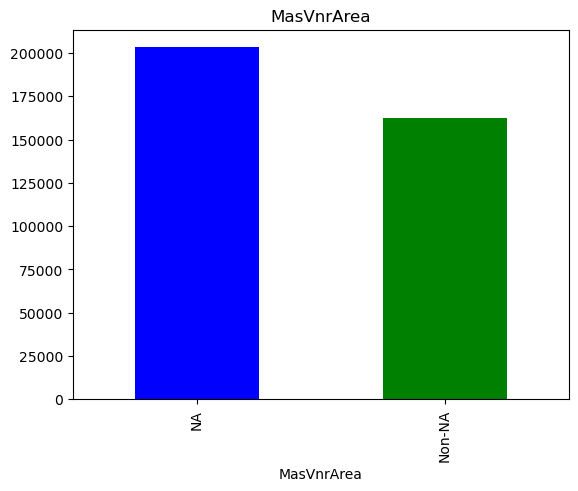

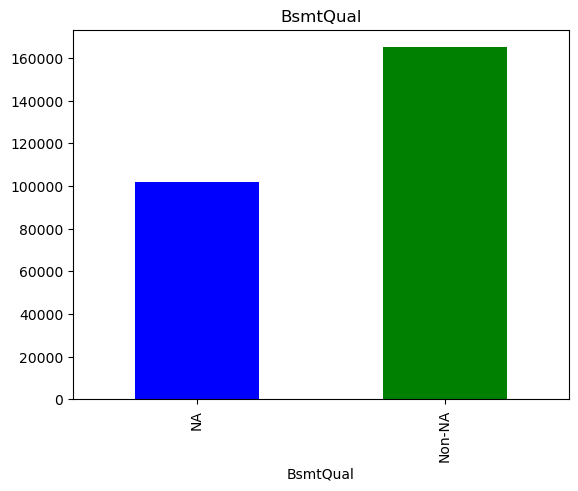

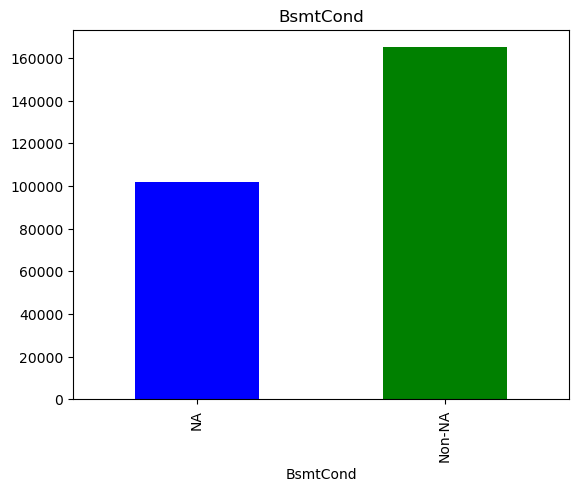

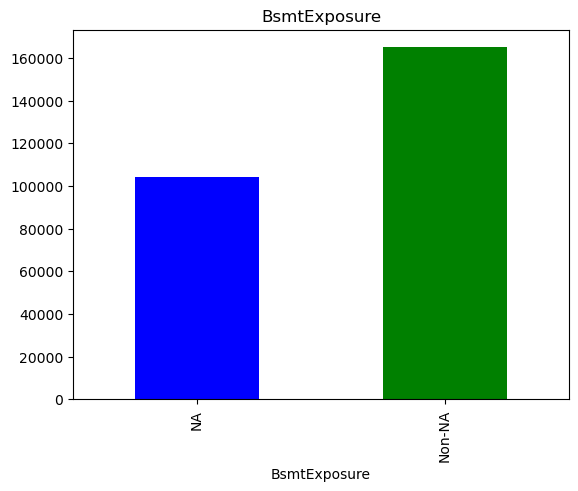

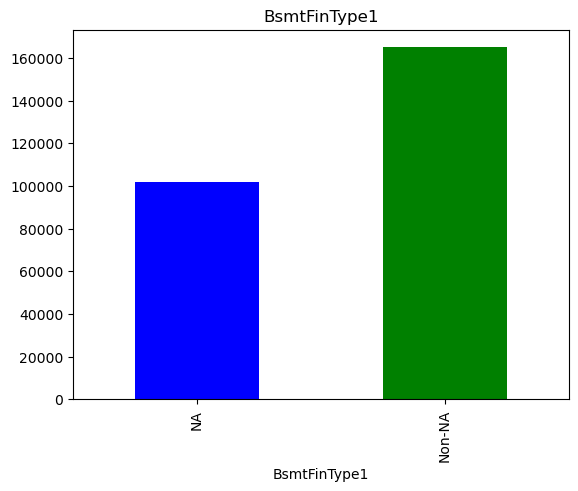

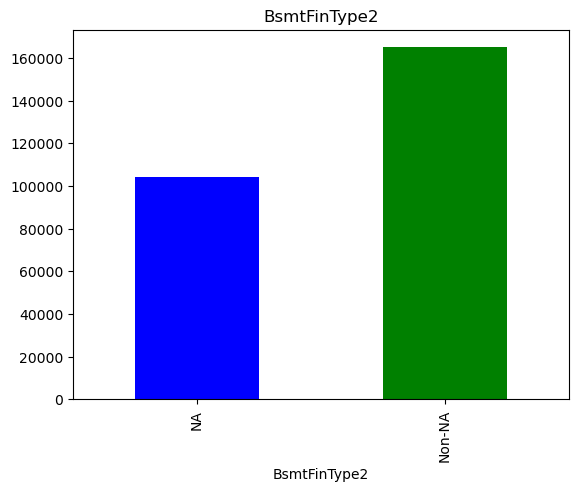

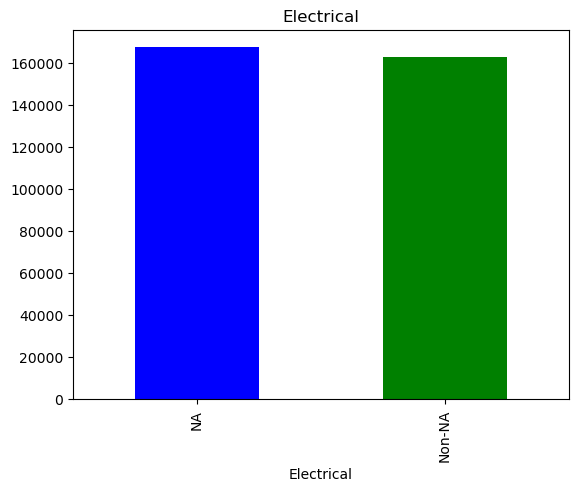

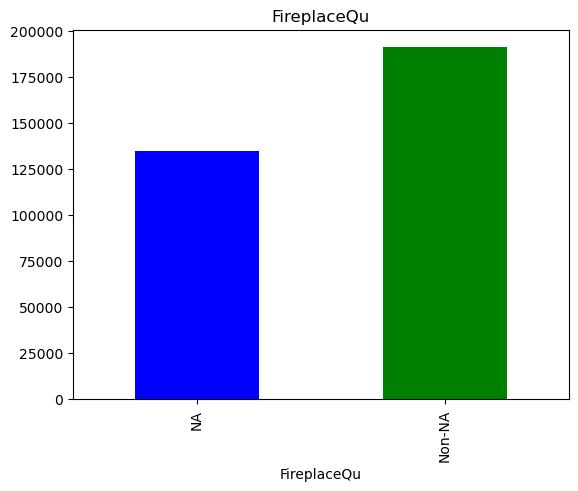

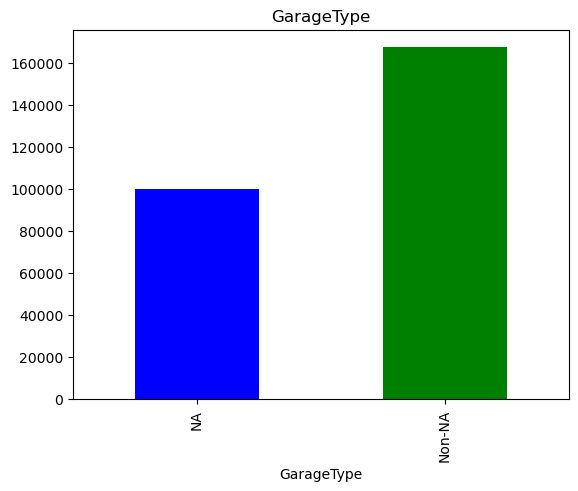

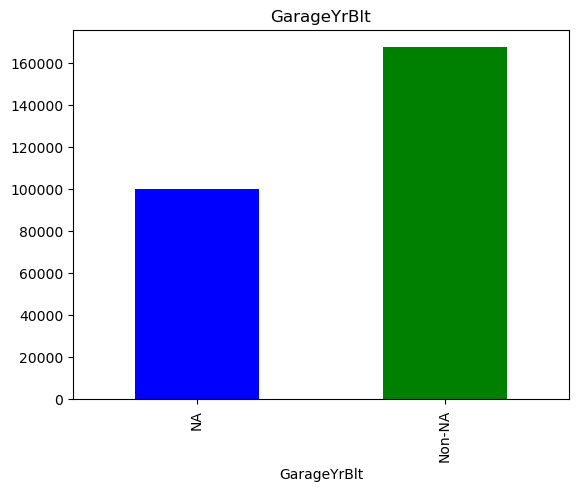

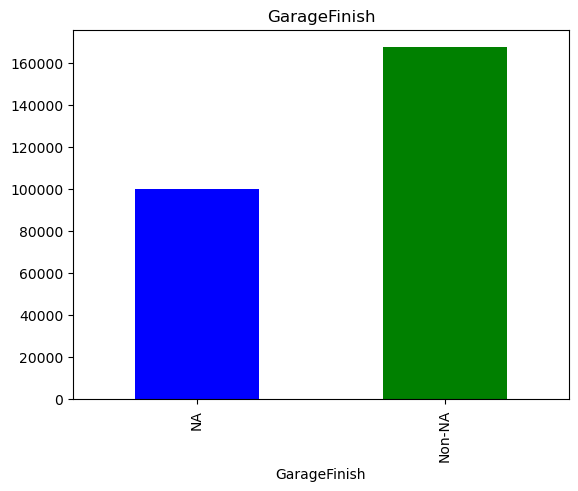

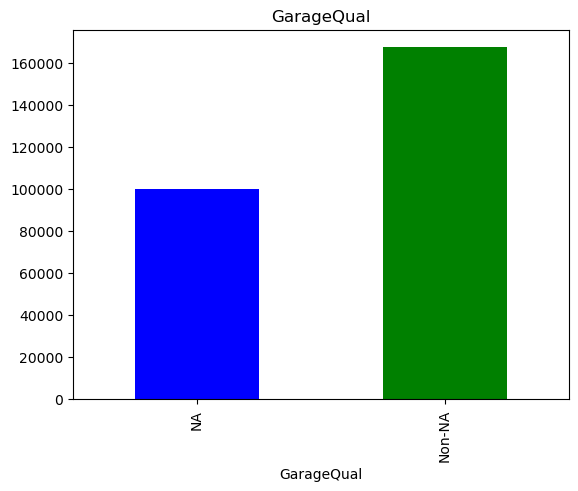

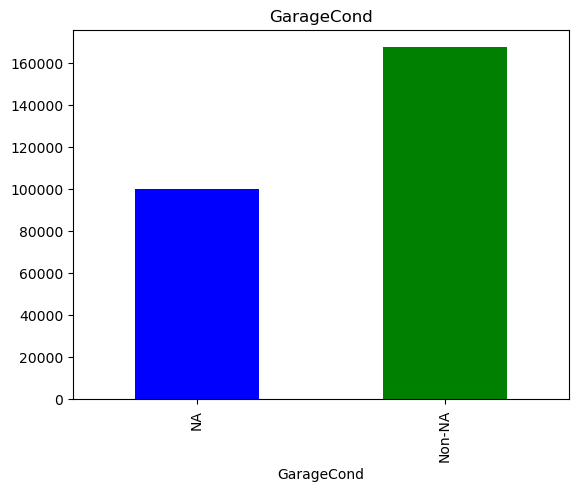

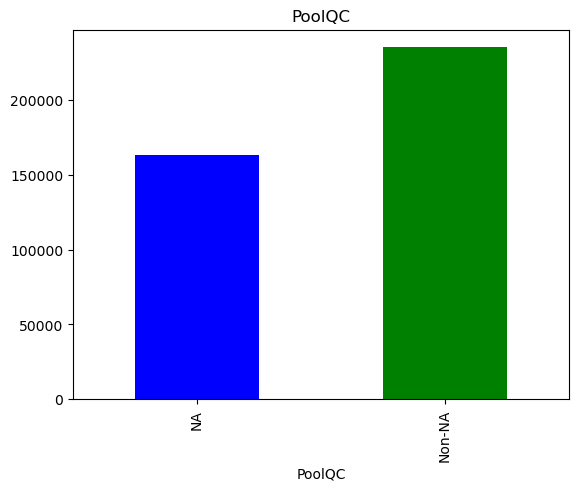

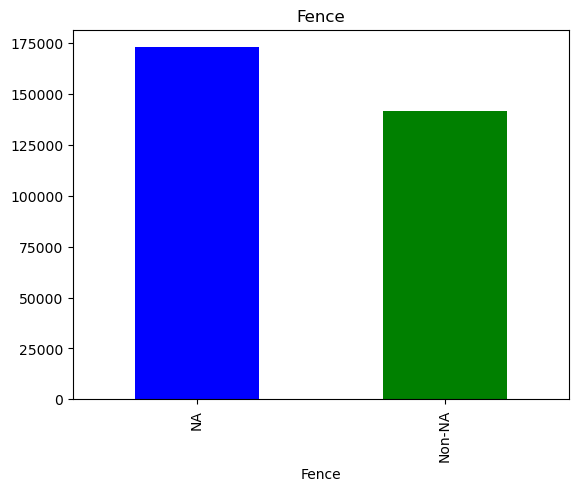

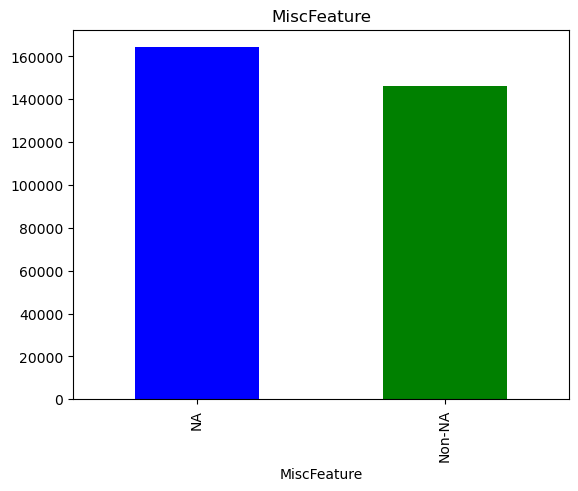

In [12]:
for col in col_with_miss_values:
    data = df.copy()
    
    data[col]= np.where(data[col].isnull(),"NA","Non-NA") # 1 indicates NA values 0 indicates non-NA values
    
    data.groupby(col)['SalePrice'].median().plot(kind='bar', color =['blue','green'])
    plt.title(col)
    plt.show()

###  median values of sales price for Na and Non-NA values is in differet range. This indicates that the missing values provides meaning and is essential in the prediction of sales price.
### For example  PoolQC feature, houses missing PoolQC have lower Sales price median than the house which have PoolQc. So it means that this NA values are required and should not be filled with any other arbitary value

<Axes: >

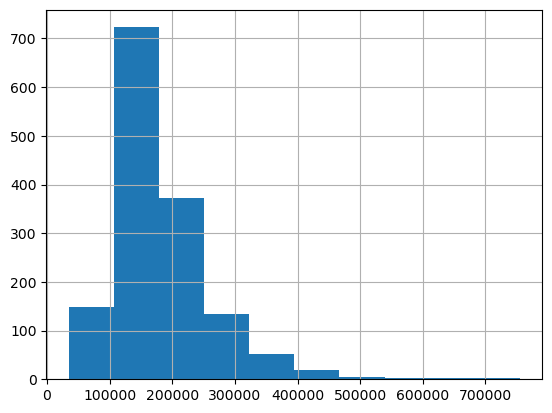

In [13]:
##why did we use median for the sales price ? 
# the histogram for sales price is not normally distributed but is slightly right skewed. hece median is better option
df['SalePrice'].hist()

### Now that the missing values have been analysed. We know that the dataframe contains 3 different types of data types
### Divide them into seperate data frames and see their impact on the Sale price


In [14]:
##seperate categorical data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [15]:
## The categorical values have dtype as object
## categorical variables have 'O' type
cat_variables = [feature for feature in df.columns if df[feature].dtype =='O']
cat_variables

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

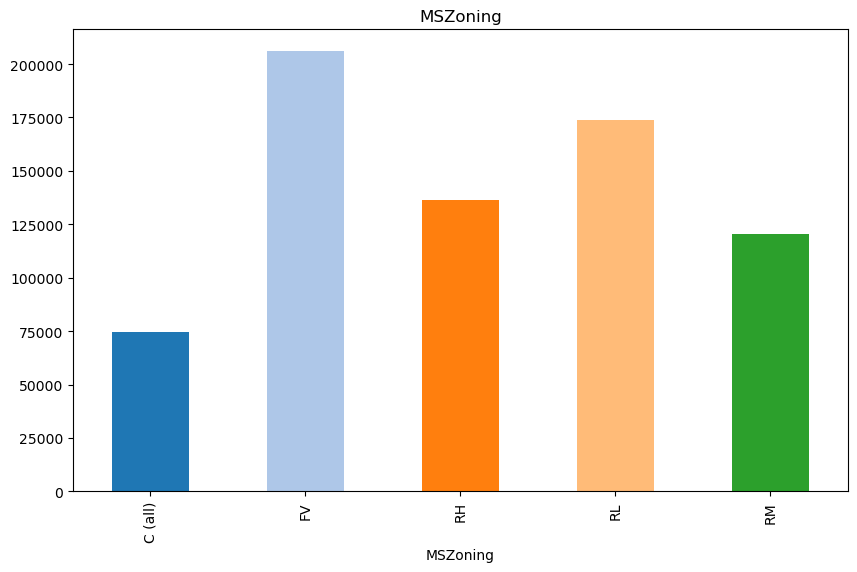

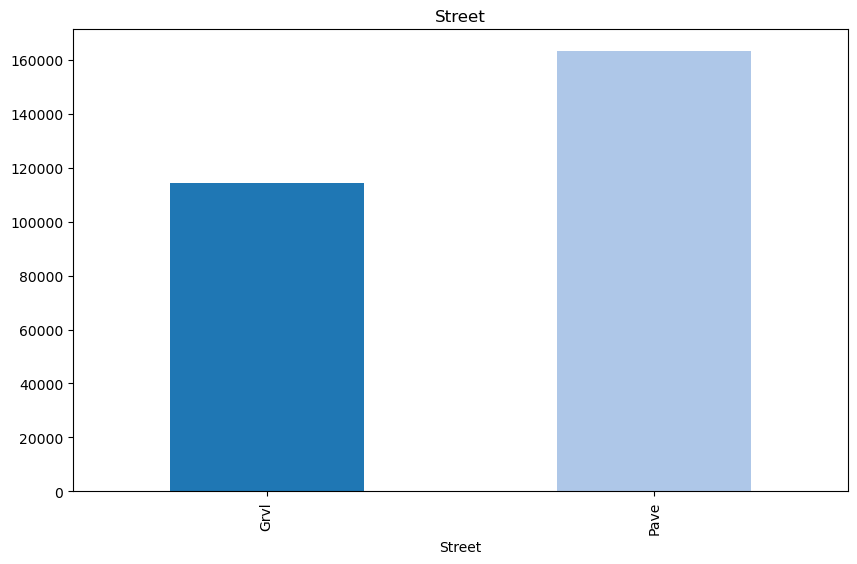

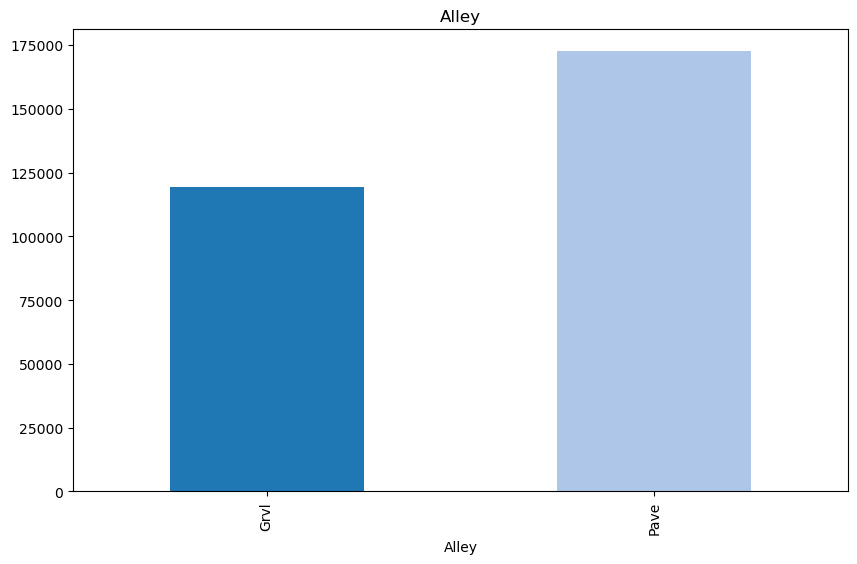

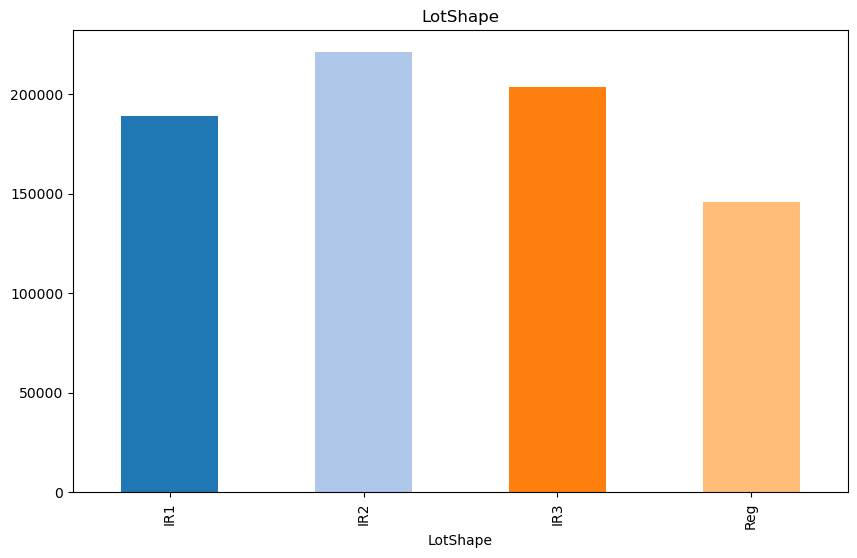

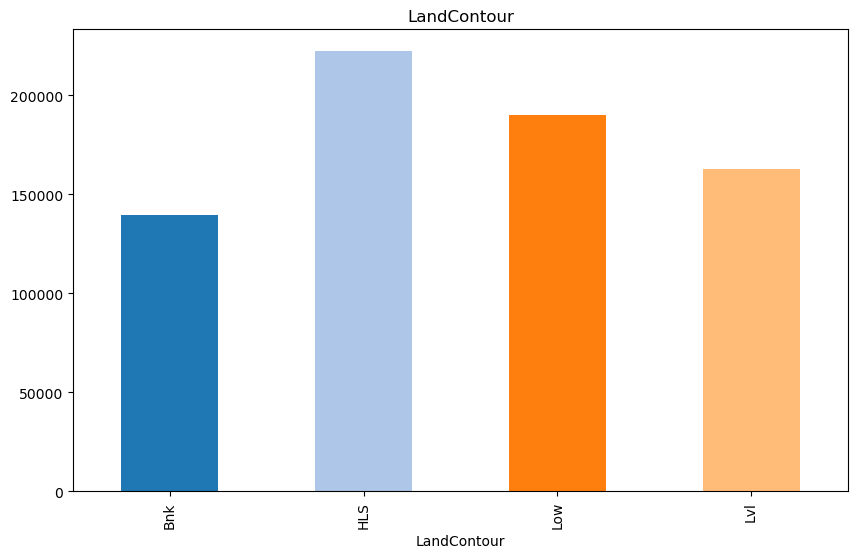

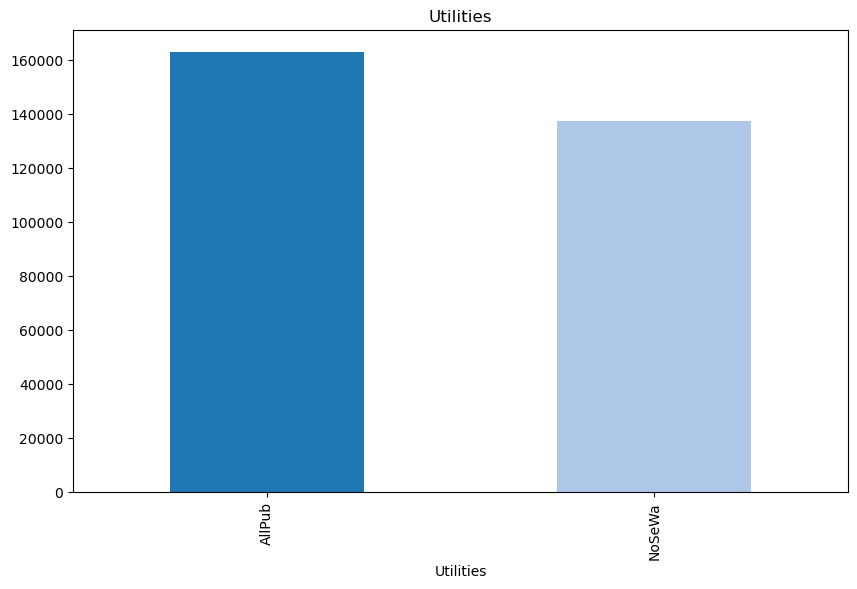

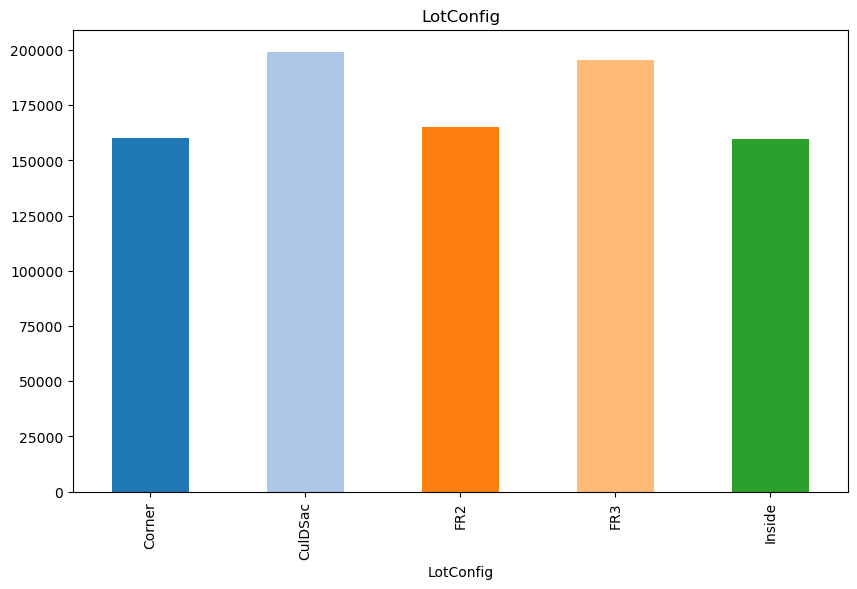

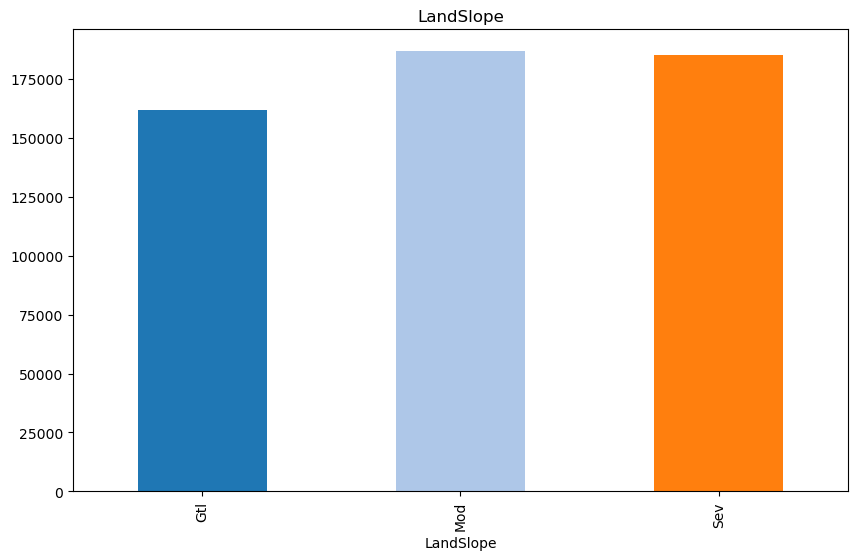

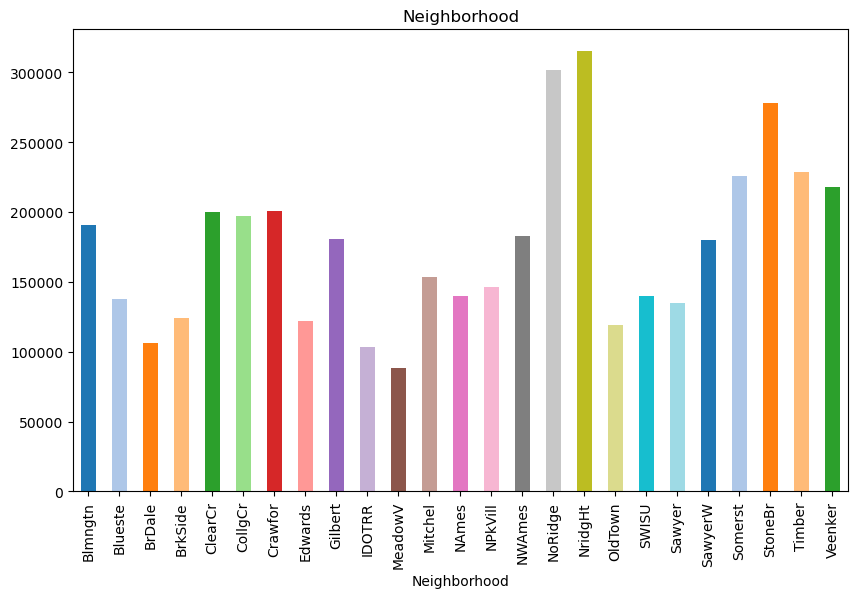

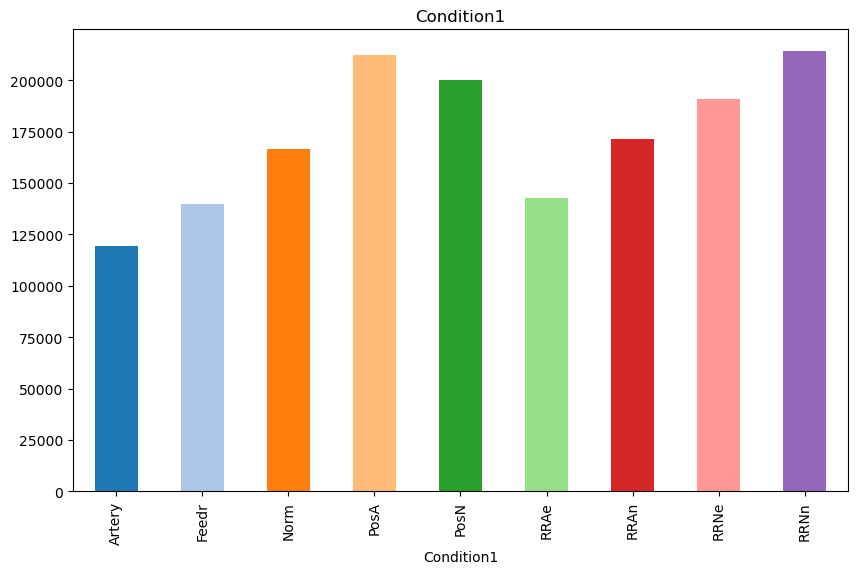

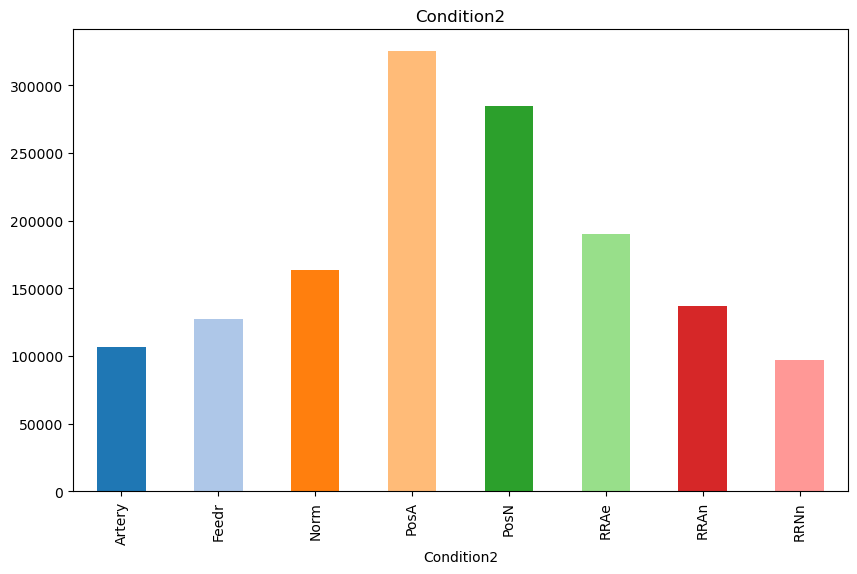

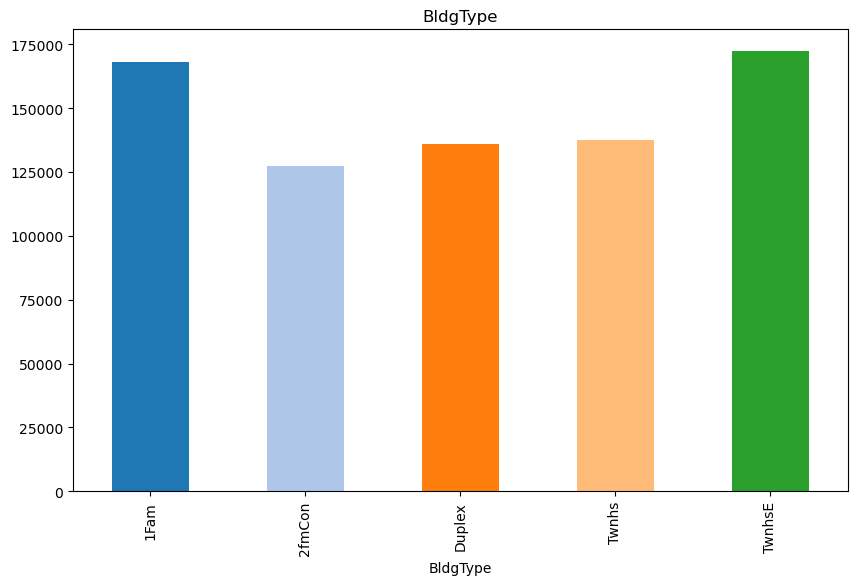

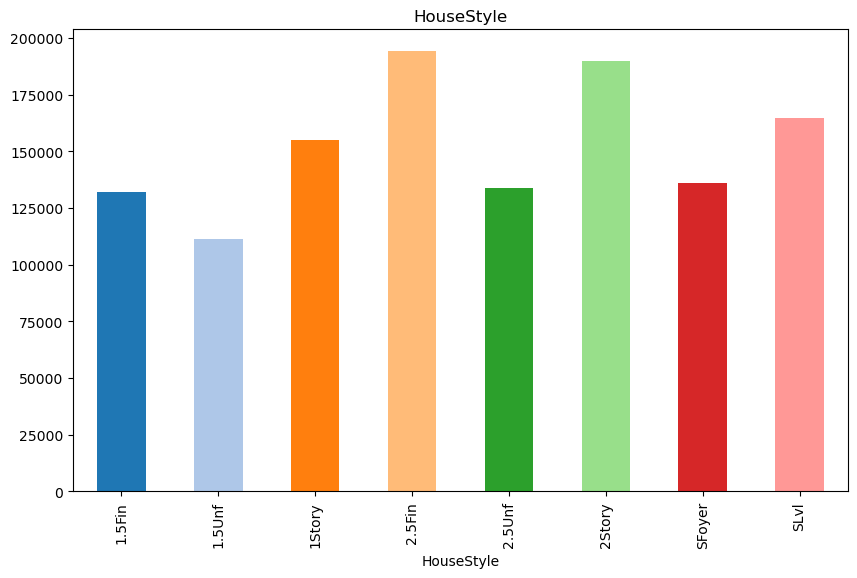

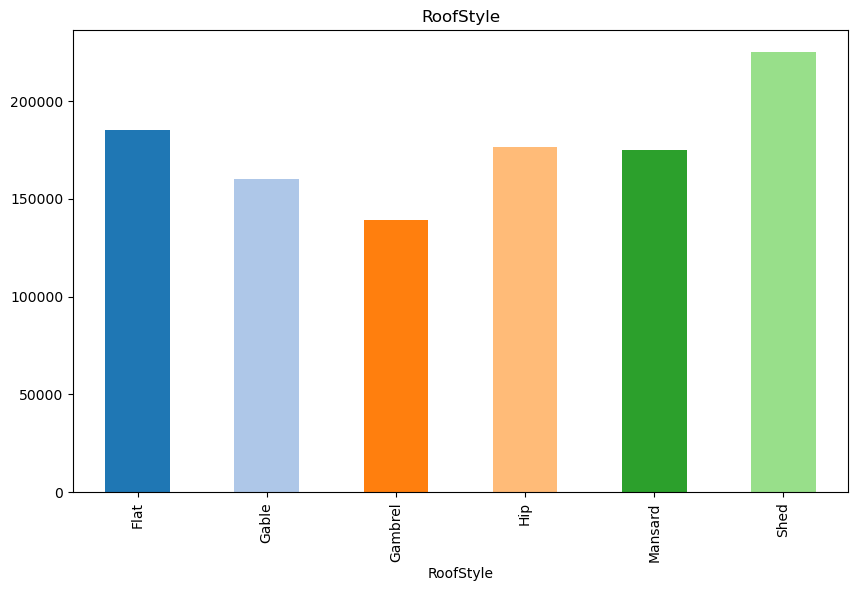

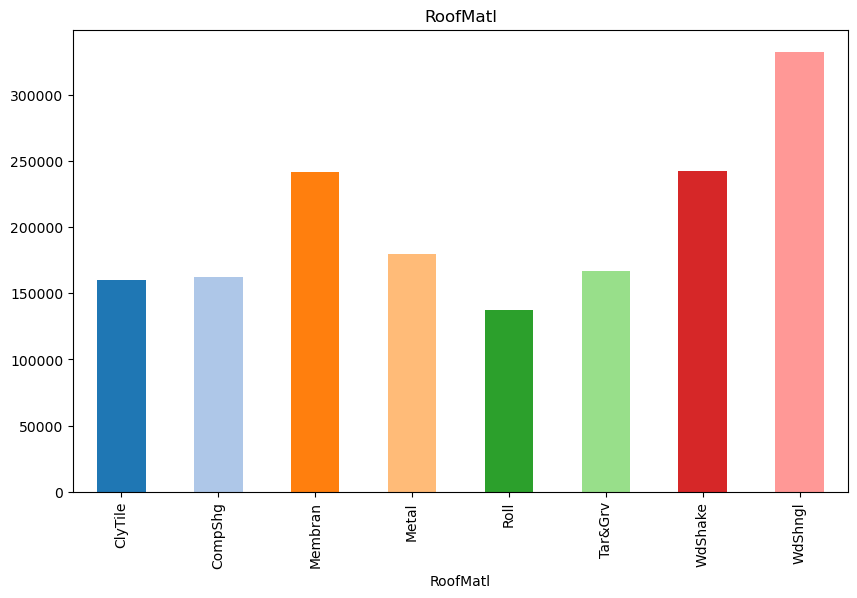

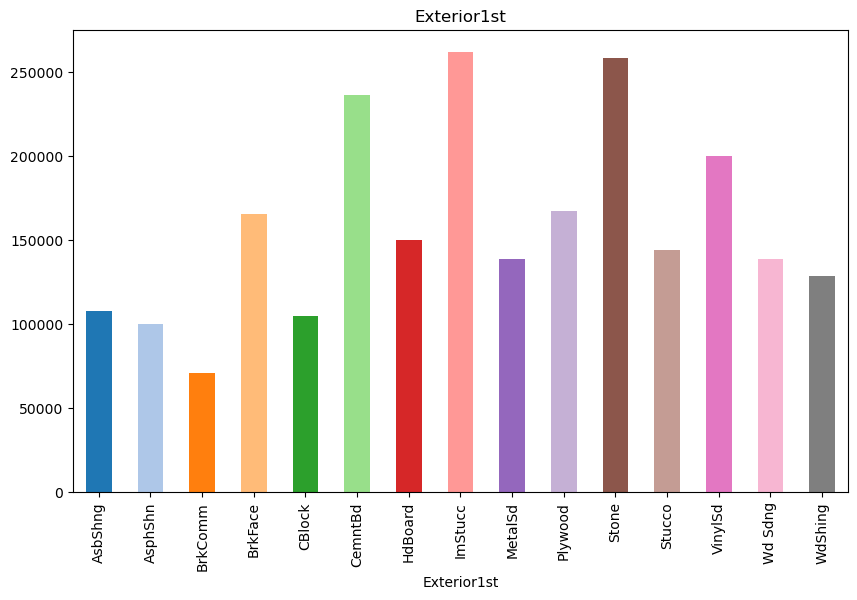

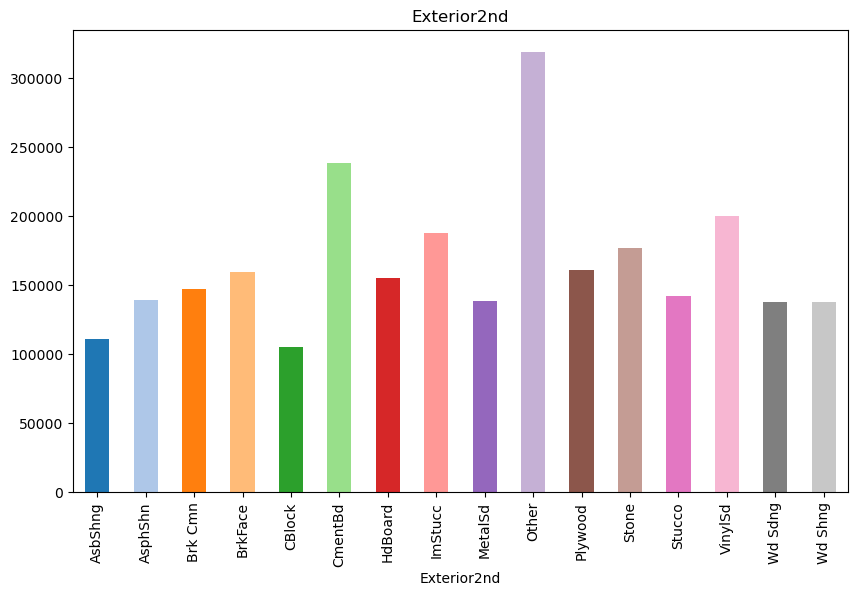

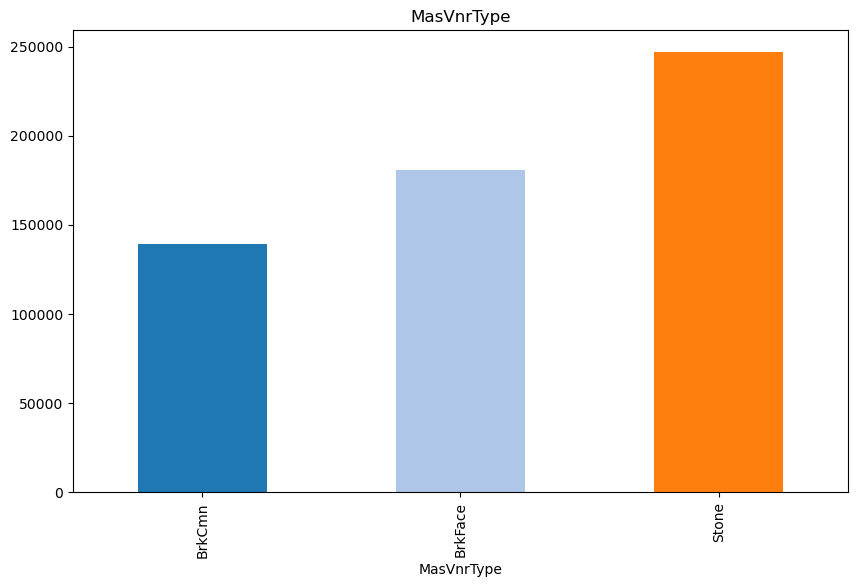

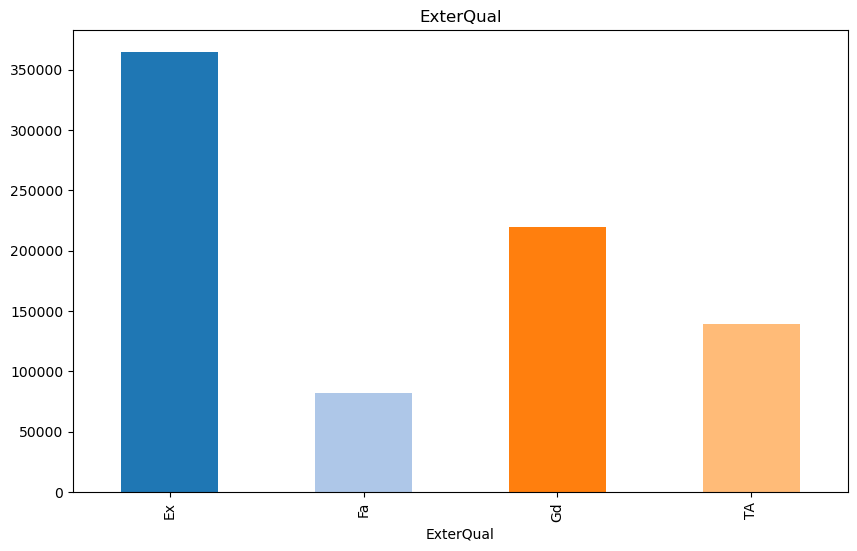

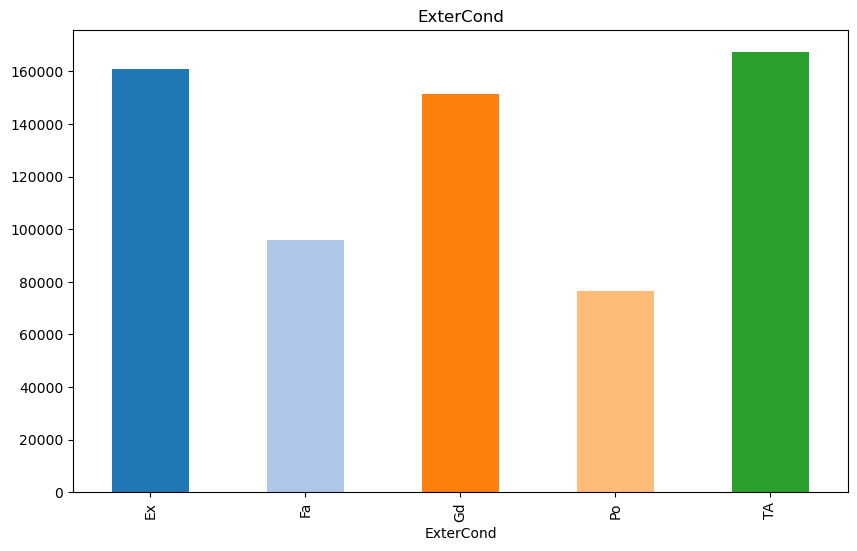

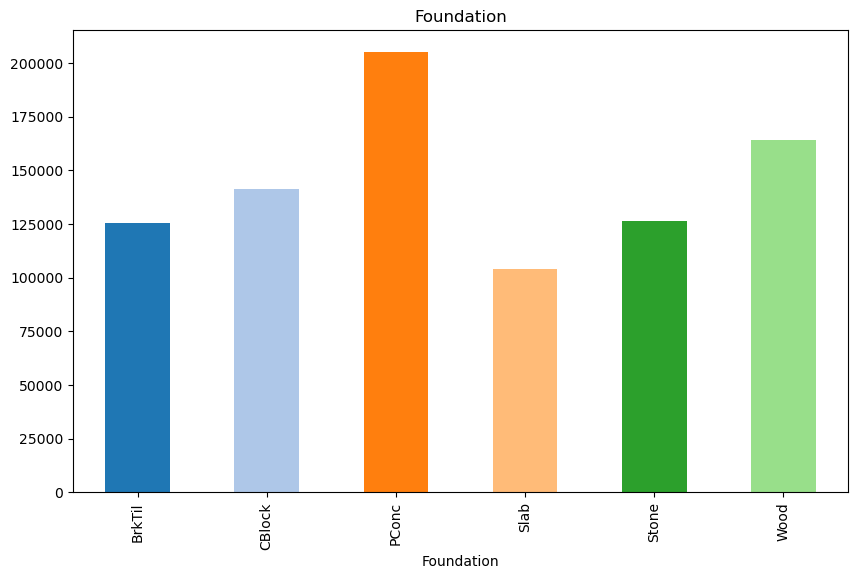

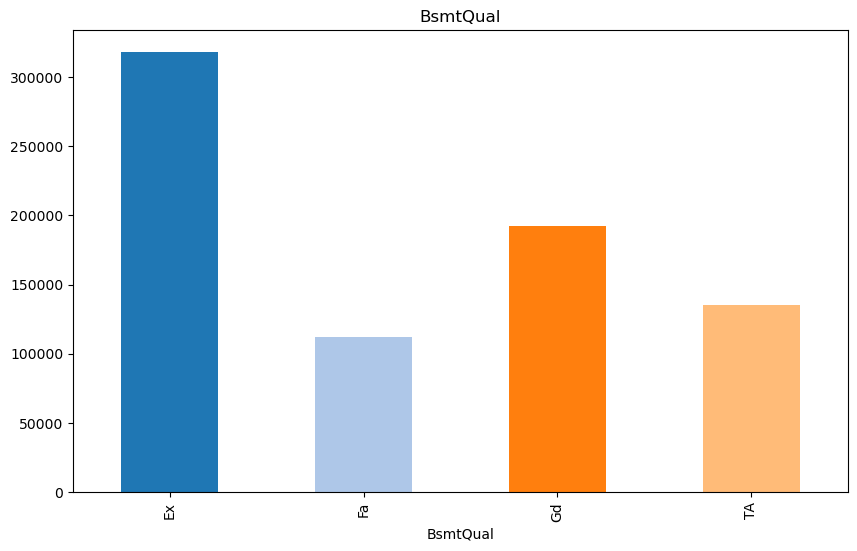

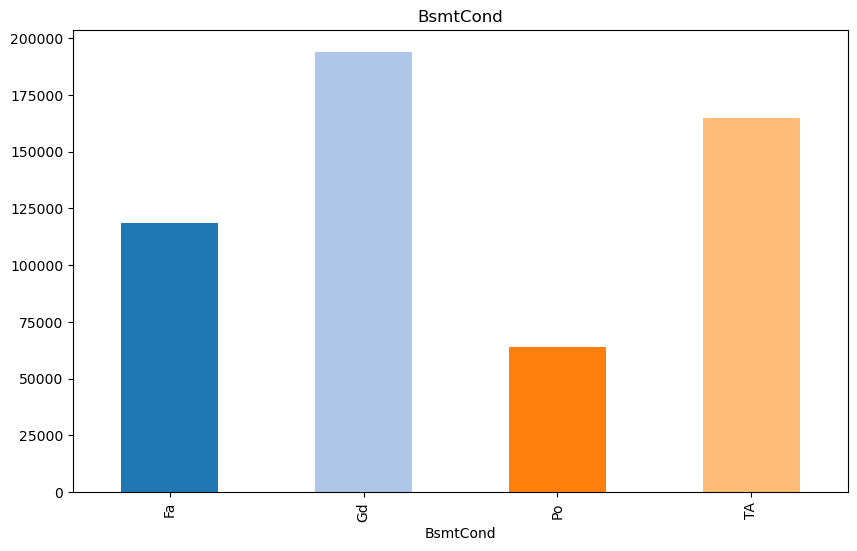

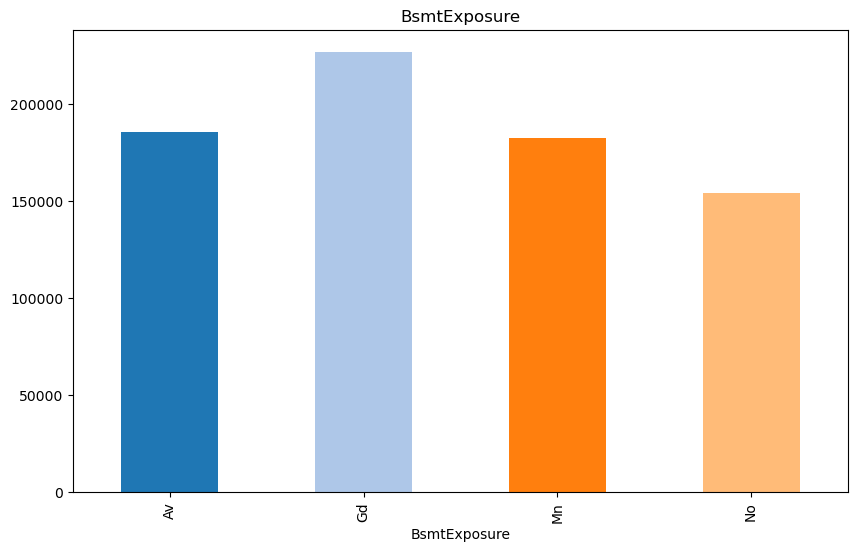

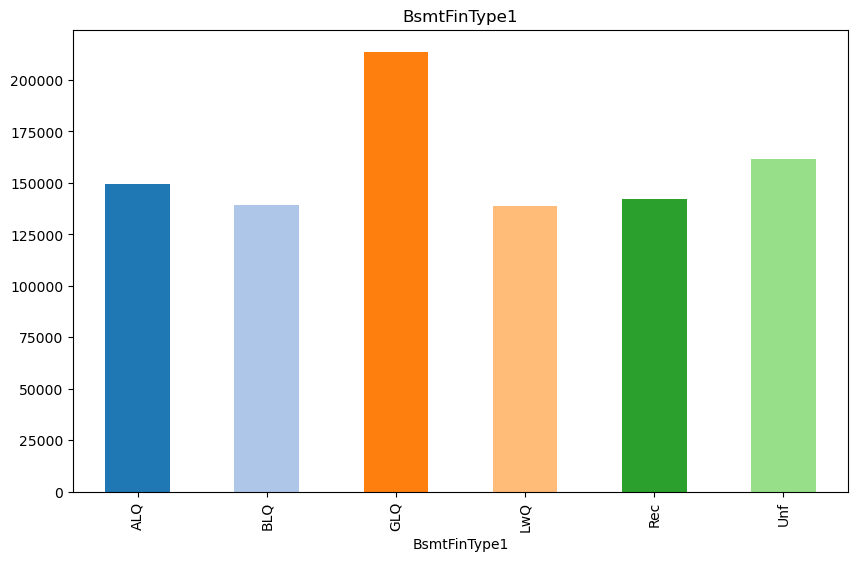

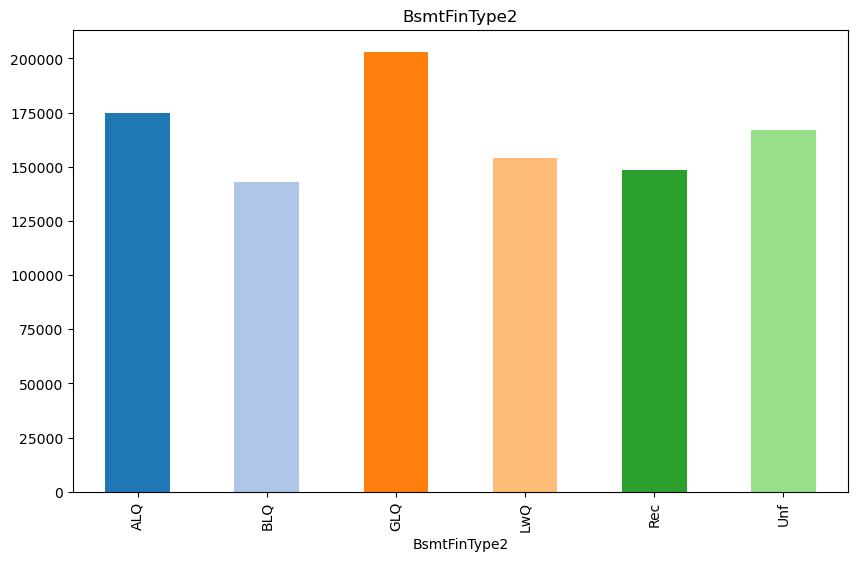

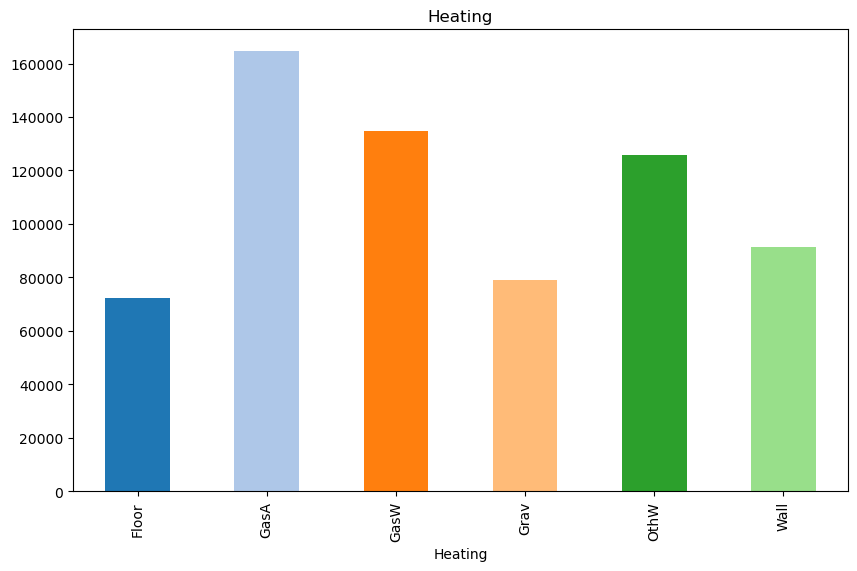

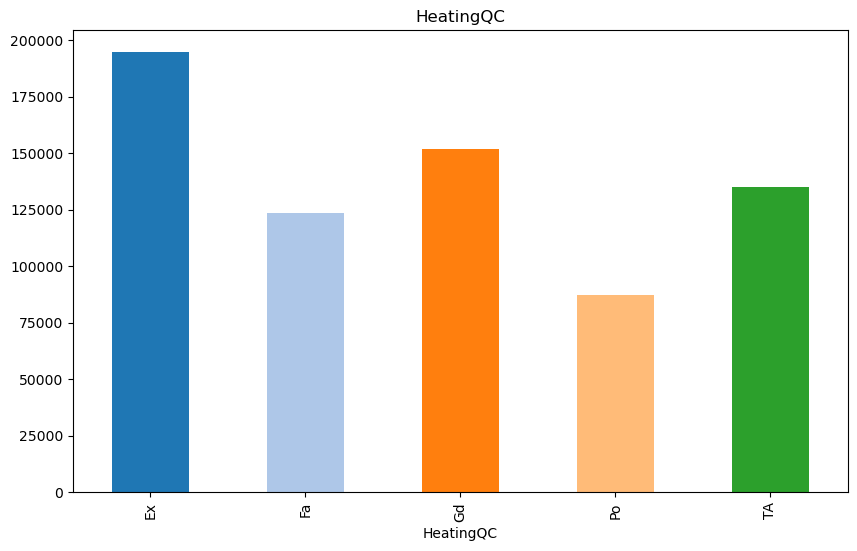

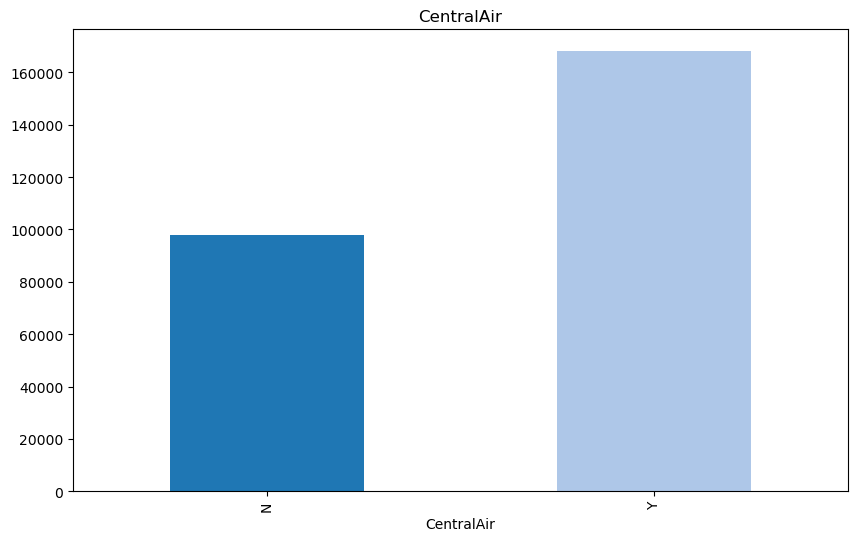

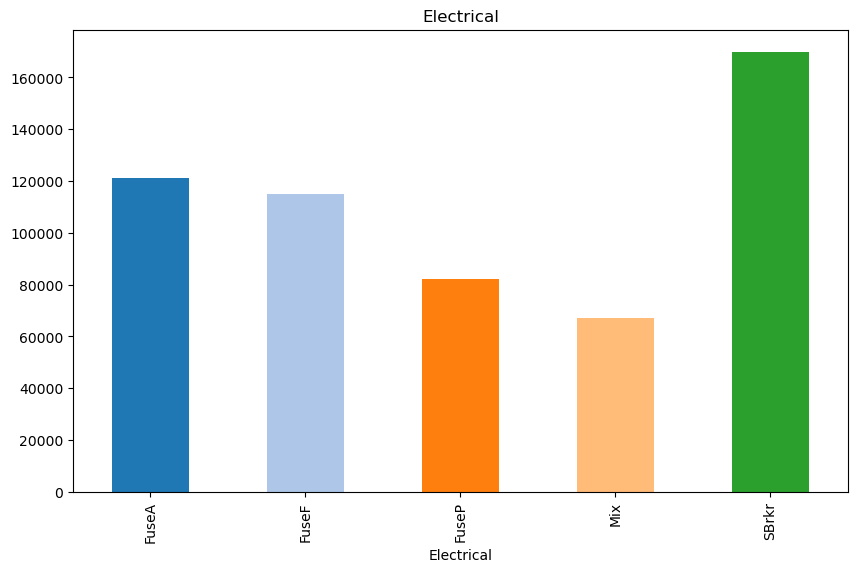

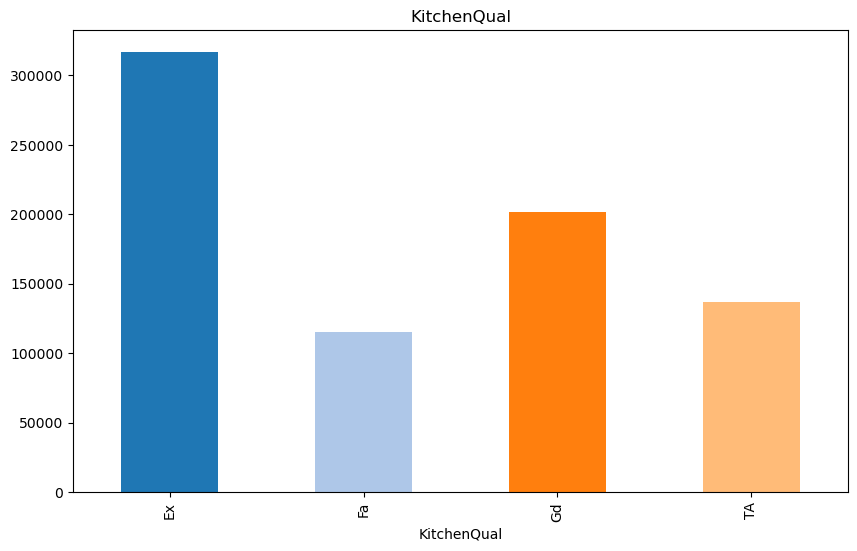

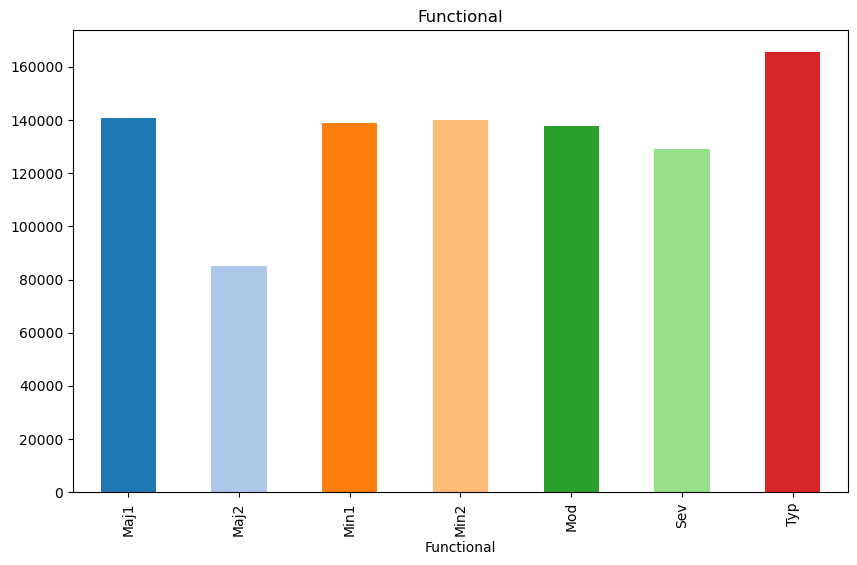

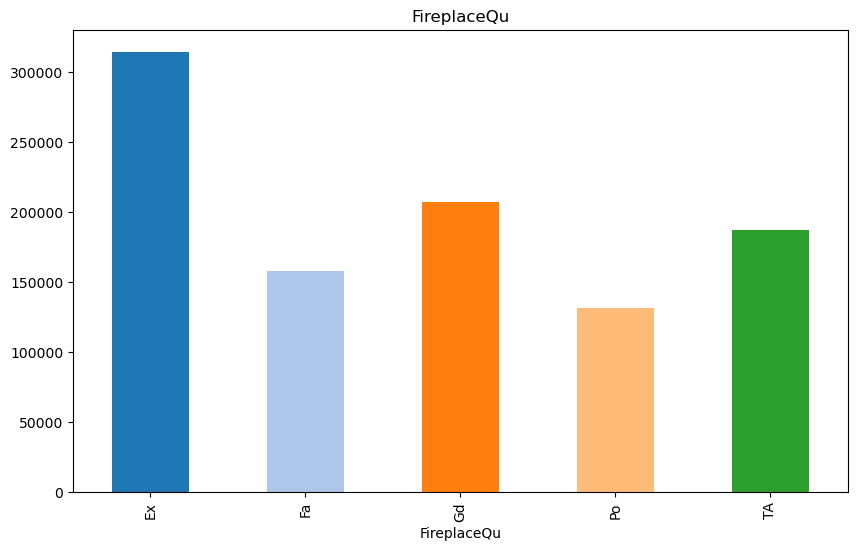

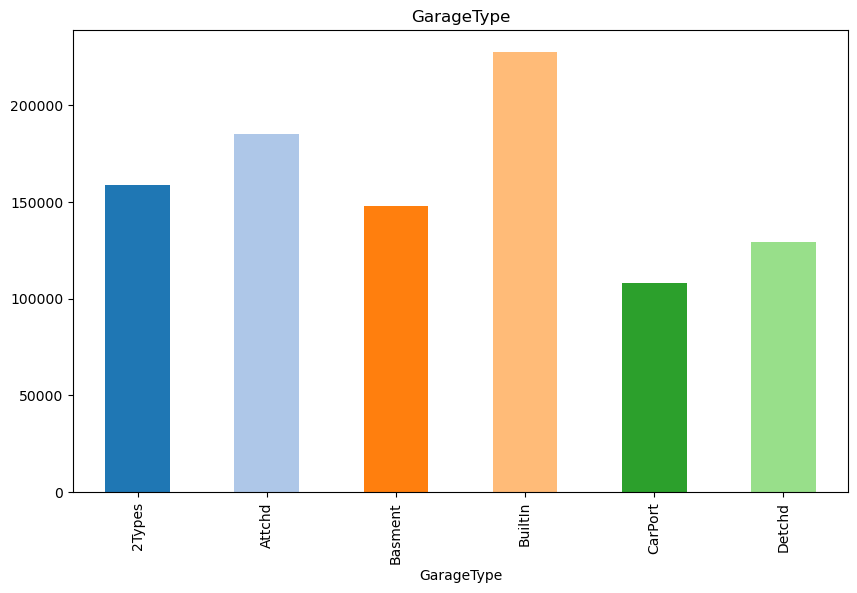

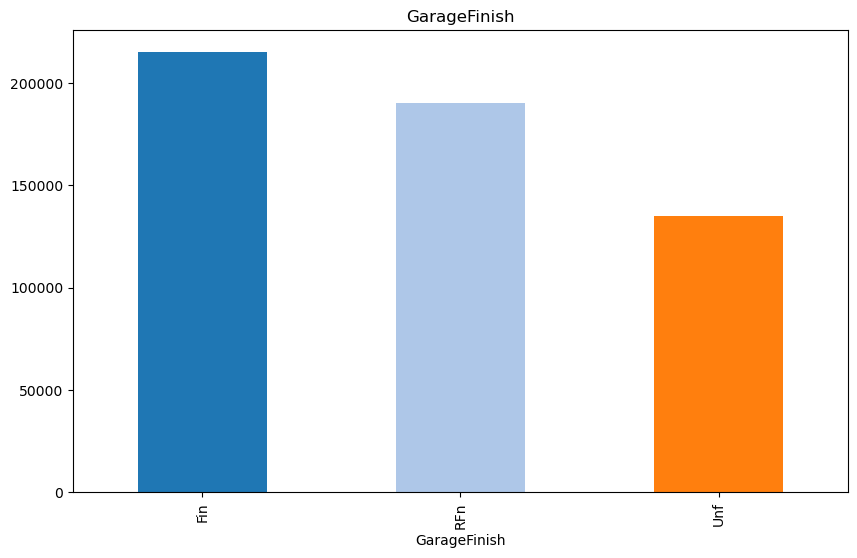

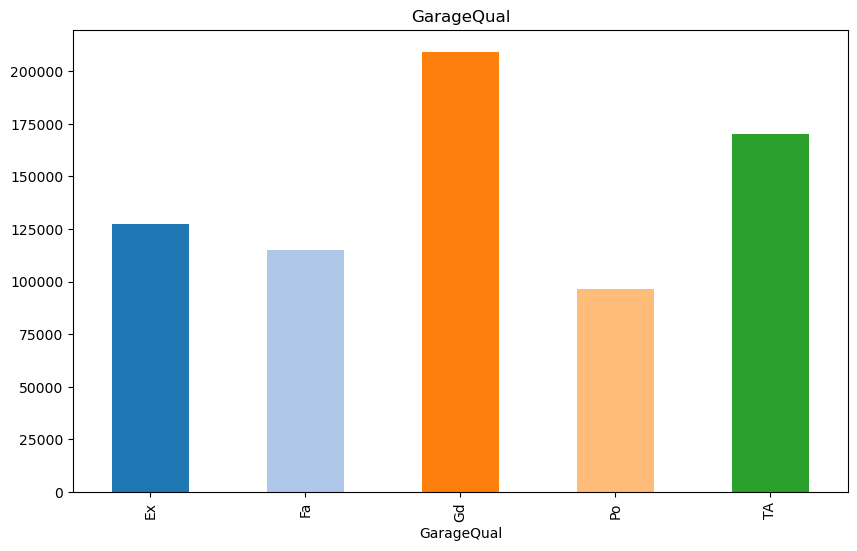

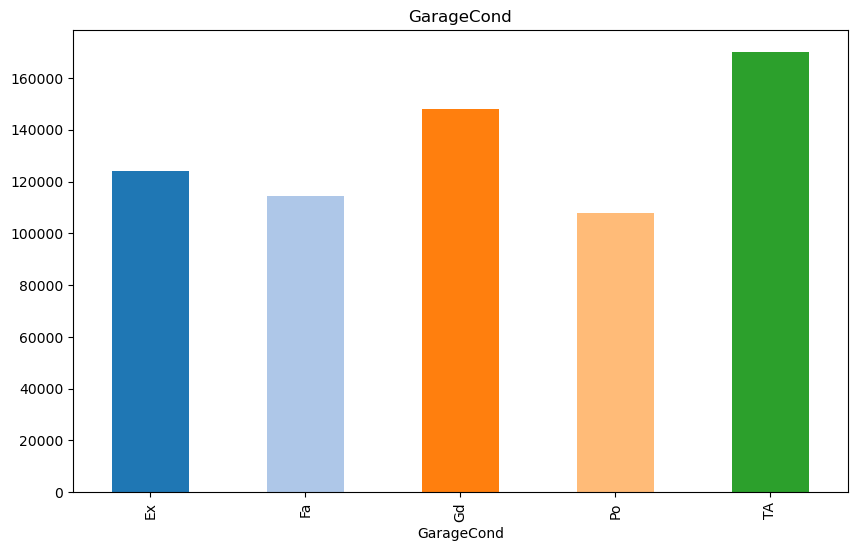

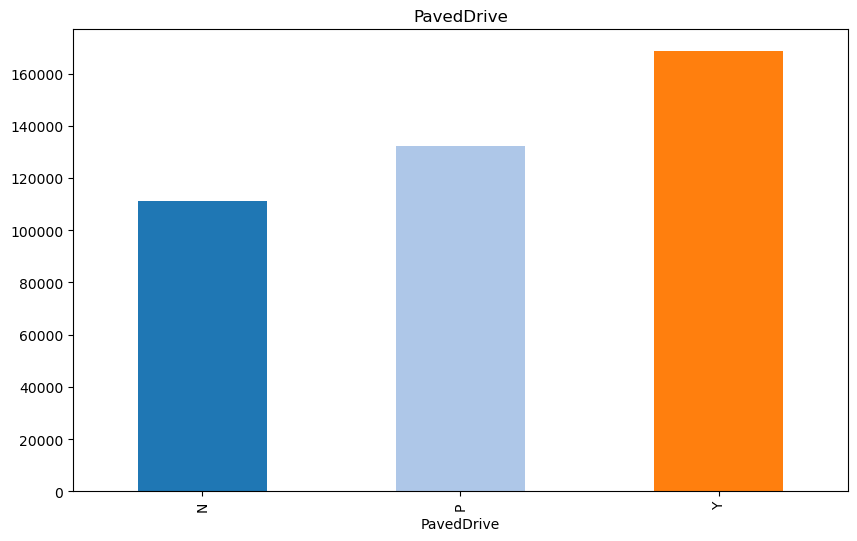

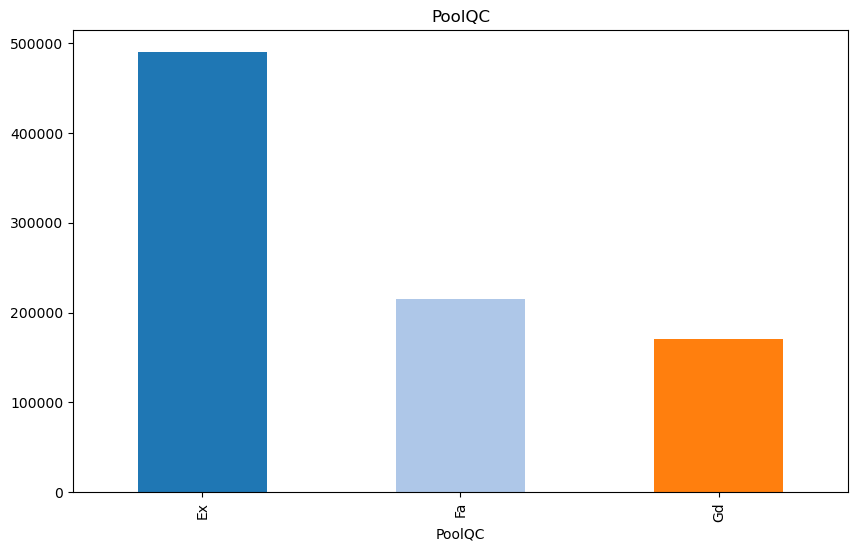

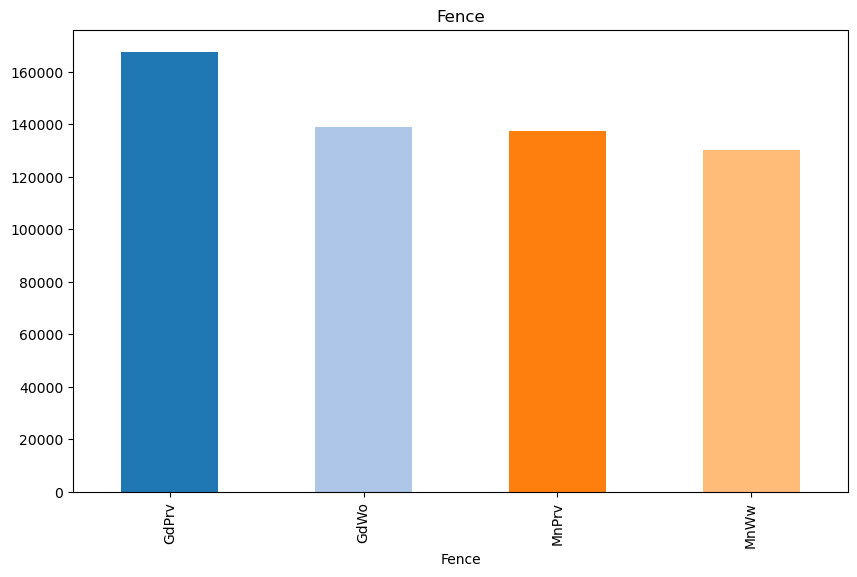

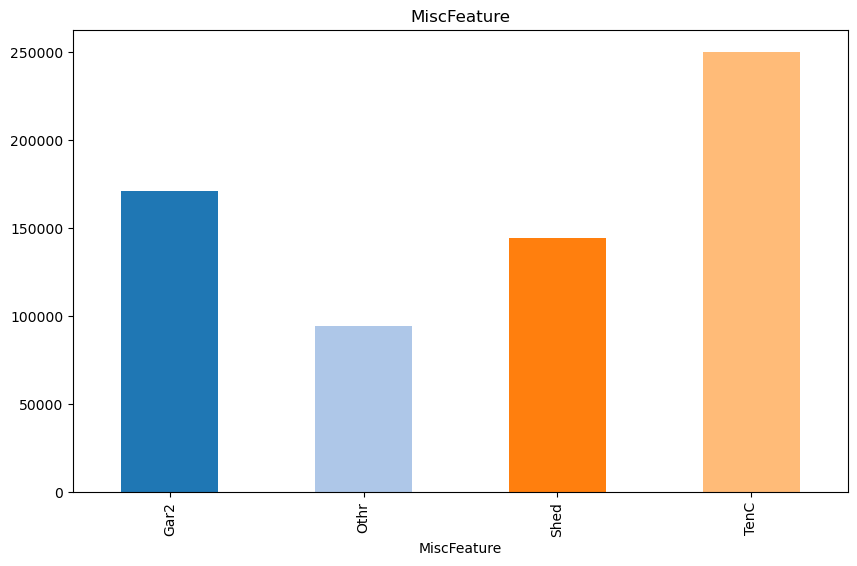

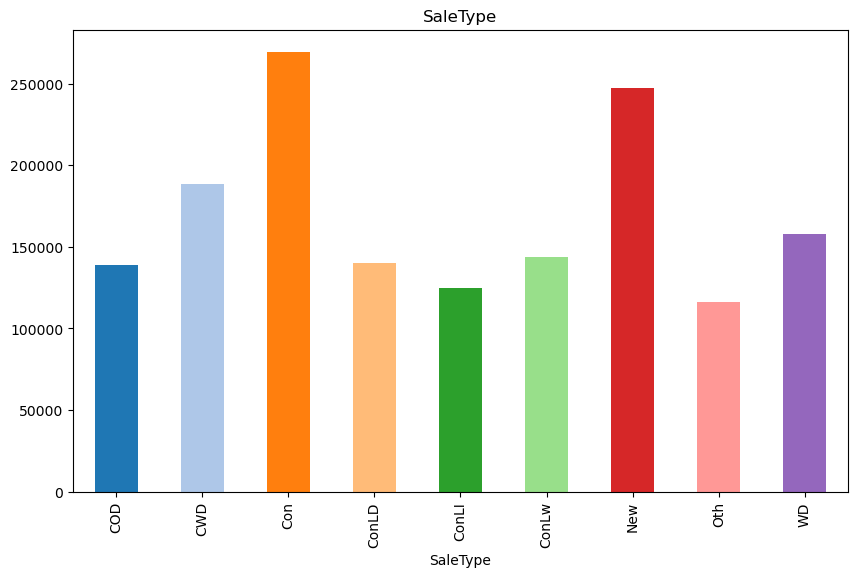

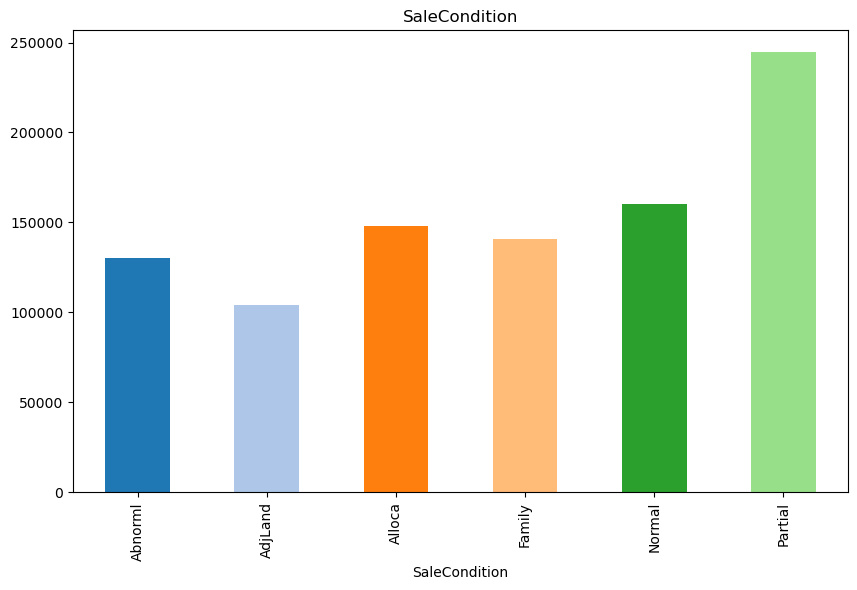

In [16]:
colors = plt.cm.tab20.colors
for feature in cat_variables:
    plt.figure(figsize=(10,6))
    df.groupby(feature)['SalePrice'].median().plot(kind='bar', color=colors)
    plt.title(feature)
    plt.show()

In [17]:
##plot for the year data 
#get all the features which are not categorical first
numerical = [feature for feature in df.columns if df[feature].dtype !='O']



In [18]:
## the dates are not in date time format they are in int or float , but the column name has 'Yr' or Year
dates =[col for col in numerical if 'Yr' in col or 'Year' in col]
dates

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [19]:
df_copy = df.copy()

In [20]:
##convert the year into year format
df_copy['YearBuilt'] = pd.to_datetime(df['YearBuilt'], format='%Y')
df_copy.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003-01-01,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976-01-01,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001-01-01,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915-01-01,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000-01-01,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [21]:
df['YearBuilt'].unique()

array([2003, 1976, 2001, 1915, 2000, 1993, 2004, 1973, 1931, 1939, 1965,
       2005, 1962, 2006, 1960, 1929, 1970, 1967, 1958, 1930, 2002, 1968,
       2007, 1951, 1957, 1927, 1920, 1966, 1959, 1994, 1954, 1953, 1955,
       1983, 1975, 1997, 1934, 1963, 1981, 1964, 1999, 1972, 1921, 1945,
       1982, 1998, 1956, 1948, 1910, 1995, 1991, 2009, 1950, 1961, 1977,
       1985, 1979, 1885, 1919, 1990, 1969, 1935, 1988, 1971, 1952, 1936,
       1923, 1924, 1984, 1926, 1940, 1941, 1987, 1986, 2008, 1908, 1892,
       1916, 1932, 1918, 1912, 1947, 1925, 1900, 1980, 1989, 1992, 1949,
       1880, 1928, 1978, 1922, 1996, 2010, 1946, 1913, 1937, 1942, 1938,
       1974, 1893, 1914, 1906, 1890, 1898, 1904, 1882, 1875, 1911, 1917,
       1872, 1905], dtype=int64)

In [22]:
df_copy['YearBuilt'].unique()

<DatetimeArray>
['2003-01-01 00:00:00', '1976-01-01 00:00:00', '2001-01-01 00:00:00',
 '1915-01-01 00:00:00', '2000-01-01 00:00:00', '1993-01-01 00:00:00',
 '2004-01-01 00:00:00', '1973-01-01 00:00:00', '1931-01-01 00:00:00',
 '1939-01-01 00:00:00',
 ...
 '1906-01-01 00:00:00', '1890-01-01 00:00:00', '1898-01-01 00:00:00',
 '1904-01-01 00:00:00', '1882-01-01 00:00:00', '1875-01-01 00:00:00',
 '1911-01-01 00:00:00', '1917-01-01 00:00:00', '1872-01-01 00:00:00',
 '1905-01-01 00:00:00']
Length: 112, dtype: datetime64[ns]

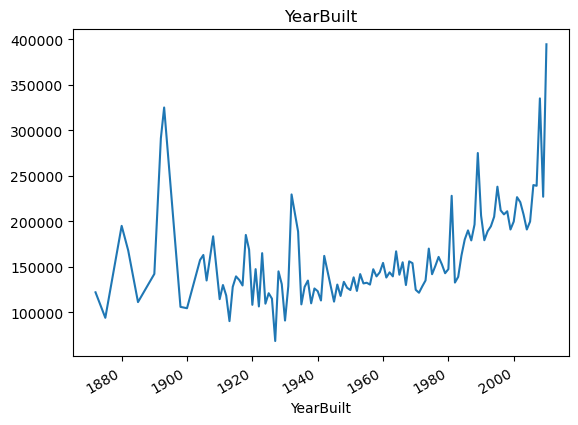

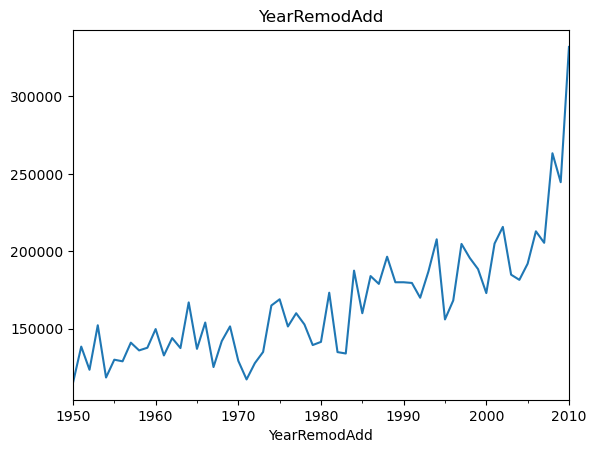

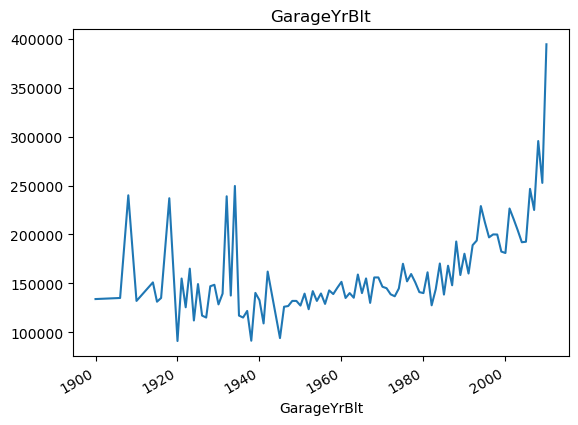

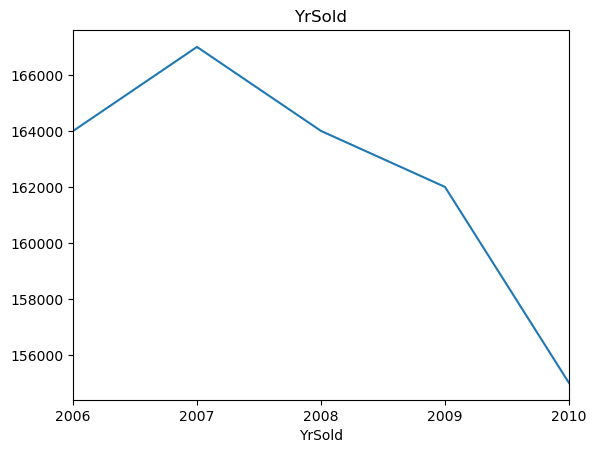

In [23]:
## built a graph based on these dates: use a line chart for this
for col in dates:
    data = df.copy()
    data[col] = pd.to_datetime(data[col], format='%Y')
    data.groupby(col)['SalePrice'].median().plot()
    plt.title(col)
    plt.show()

## notice that the median of the saleprice is gradually decreasing by the year ..Why? check the number of houses sold in each year

<Axes: xlabel='YrSold'>

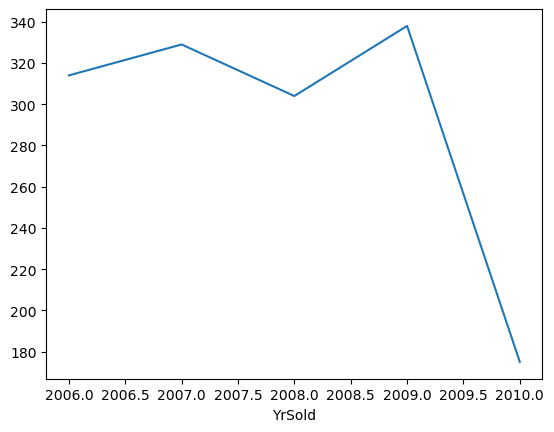

In [24]:
##plot and count how many houses have been sold in each year
df.groupby('YrSold').size().plot()

### lesser number of houses were sold in the year 2010, we can also check the number year between the houses sold  year  and when it was built.

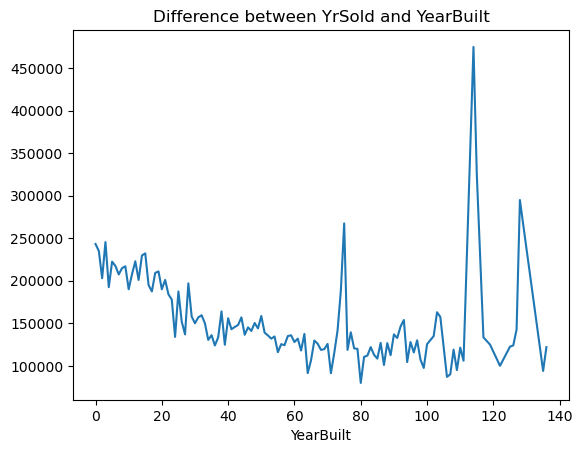

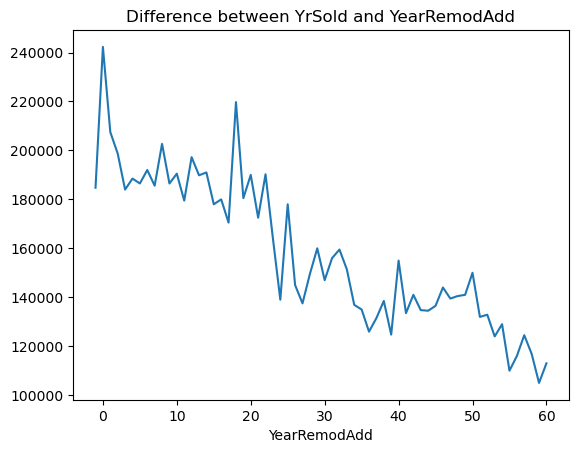

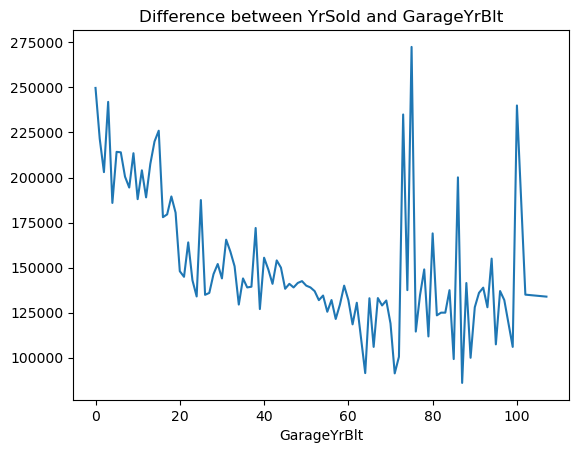

In [25]:
for col in dates:
    if col !='YrSold':
        data = df.copy()
        data[col] = data['YrSold'] - data[col]
        data.groupby(col)['SalePrice'].median().plot()
        plt.title(f"Difference between YrSold and {col}")
        plt.show()

#### Recetly remodoled houses have higher sales price. Year Built and Garage Yr built seem to be fluctuating 

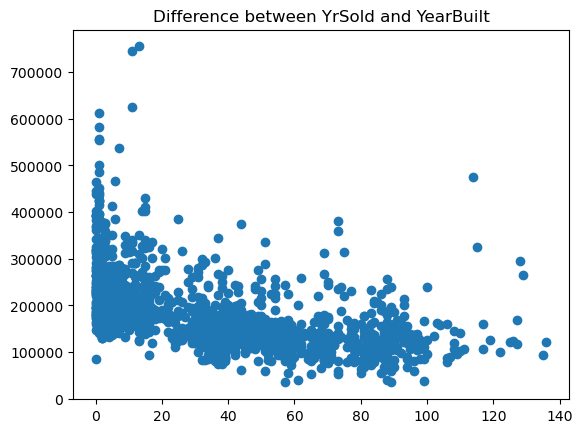

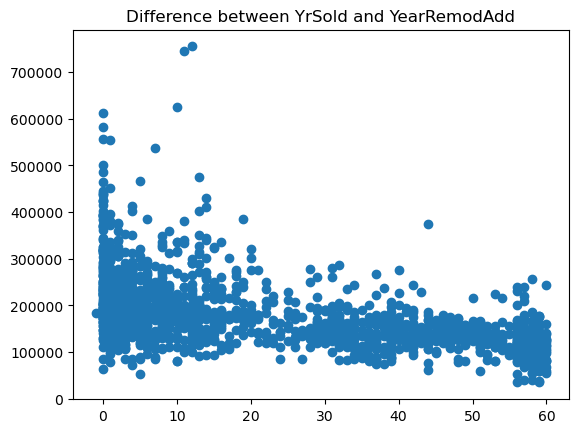

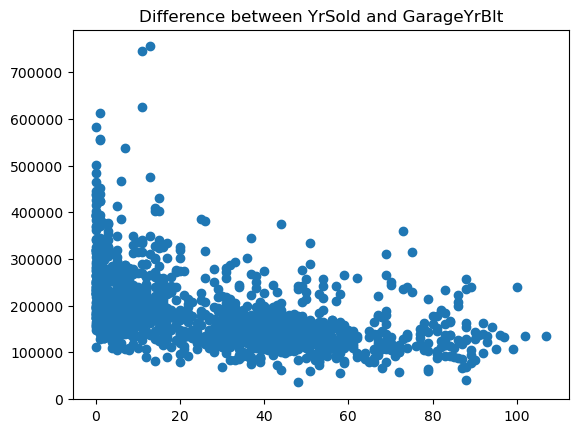

In [26]:
##use a scatter plot to see how many houses were sold with the same year difference.
for col in dates:
    if col !='YrSold':
        data = df.copy()
        data[col] = data['YrSold'] - data[col]
        plt.scatter(x=data[col], y=data['SalePrice'])
        plt.title(f"Difference between YrSold and {col}")
        plt.show()

### Houses sold more within 0-20 years after they were first built have higher sales price.
### Houses which were sold within 0-15 year after being remodelled have higher sales price
### houses which were sold within 0-20 years after they had garage build have higher sales price.

#### Overall the houses which were remodeled or build and sold within the span of 0-20 years have higher sale price values

### For Numerical values: Numerical again has discrete and continous
1. Discreate : Use a bar graph again
2. Continuous: use a histogram plot
    

In [27]:
## plot for the disceret nmerical values
num_col = [col for col in numerical if col not in ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']]
num_col

['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'SalePrice']

In [28]:
df[num_col].head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice
0,1,60,65.0,8450,7,5,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2,548,0,61,0,0,0,0,0,2,208500
1,2,20,80.0,9600,6,8,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,2,460,298,0,0,0,0,0,0,5,181500
2,3,60,68.0,11250,7,5,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2,608,0,42,0,0,0,0,0,9,223500
3,4,70,60.0,9550,7,5,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,3,642,0,35,272,0,0,0,0,2,140000
4,5,60,84.0,14260,8,5,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,3,836,192,84,0,0,0,0,0,12,250000


In [29]:
### How to seperate the discrete values from continuous values...
##Discrete valueshave lesser number of unique values such as number of rooms being 1,2,3... atmost 6 but continous values
##can take any number which can exceed the unique number of values

##Example
df['OverallQual'].unique()

array([ 7,  6,  8,  5,  9,  4, 10,  3,  1,  2], dtype=int64)

In [30]:
df['MasVnrArea'].unique()

array([1.960e+02, 0.000e+00, 1.620e+02, 3.500e+02, 1.860e+02, 2.400e+02,
       2.860e+02, 3.060e+02, 2.120e+02, 1.800e+02, 3.800e+02, 2.810e+02,
       6.400e+02, 2.000e+02, 2.460e+02, 1.320e+02, 6.500e+02, 1.010e+02,
       4.120e+02, 2.720e+02, 4.560e+02, 1.031e+03, 1.780e+02, 5.730e+02,
       3.440e+02, 2.870e+02, 1.670e+02, 1.115e+03, 4.000e+01, 1.040e+02,
       5.760e+02, 4.430e+02, 4.680e+02, 6.600e+01, 2.200e+01, 2.840e+02,
       7.600e+01, 2.030e+02, 6.800e+01, 1.830e+02, 4.800e+01, 2.800e+01,
       3.360e+02, 6.000e+02, 7.680e+02, 4.800e+02, 2.200e+02, 1.840e+02,
       1.129e+03, 1.160e+02, 1.350e+02, 2.660e+02, 8.500e+01, 3.090e+02,
       1.360e+02, 2.880e+02, 7.000e+01, 3.200e+02, 5.000e+01, 1.200e+02,
       4.360e+02, 2.520e+02, 8.400e+01, 6.640e+02, 2.260e+02, 3.000e+02,
       6.530e+02, 1.120e+02, 4.910e+02, 2.680e+02, 7.480e+02, 9.800e+01,
       2.750e+02, 1.380e+02, 2.050e+02, 2.620e+02, 1.280e+02, 2.600e+02,
       1.530e+02, 6.400e+01, 3.120e+02, 1.600e+01, 

In [31]:
##Notice how both the above columns have differetn number of unique values.. the first is obviously a discrete varibale the next one is continous
for col in num_col:
    uniq = len(df[col].unique())
    print(f"{col} ..... {uniq}")


Id ..... 1460
MSSubClass ..... 15
LotFrontage ..... 111
LotArea ..... 1073
OverallQual ..... 10
OverallCond ..... 9
MasVnrArea ..... 328
BsmtFinSF1 ..... 637
BsmtFinSF2 ..... 144
BsmtUnfSF ..... 780
TotalBsmtSF ..... 721
1stFlrSF ..... 753
2ndFlrSF ..... 417
LowQualFinSF ..... 24
GrLivArea ..... 861
BsmtFullBath ..... 4
BsmtHalfBath ..... 3
FullBath ..... 4
HalfBath ..... 3
BedroomAbvGr ..... 8
KitchenAbvGr ..... 4
TotRmsAbvGrd ..... 12
Fireplaces ..... 4
GarageCars ..... 5
GarageArea ..... 441
WoodDeckSF ..... 274
OpenPorchSF ..... 202
EnclosedPorch ..... 120
3SsnPorch ..... 20
ScreenPorch ..... 76
PoolArea ..... 8
MiscVal ..... 21
MoSold ..... 12
SalePrice ..... 663


### based on the above data we can set a threshold value for the number of unique values. The highest number of unique values are present in LowQualFinSf which is 24

In [32]:
##seperate the discrete and categorical values
disc_cols = [col for col in num_col if len(df[col].unique())<=25]
cont_cols = [col for col in num_col if len(df[col].unique())>25]

In [33]:
disc_cols

['MSSubClass',
 'OverallQual',
 'OverallCond',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 '3SsnPorch',
 'PoolArea',
 'MiscVal',
 'MoSold']

In [34]:
cont_cols = cont_cols[2:]
##drop ID it does not need to be in continous values

In [35]:
cont_cols

['LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch',
 'SalePrice']

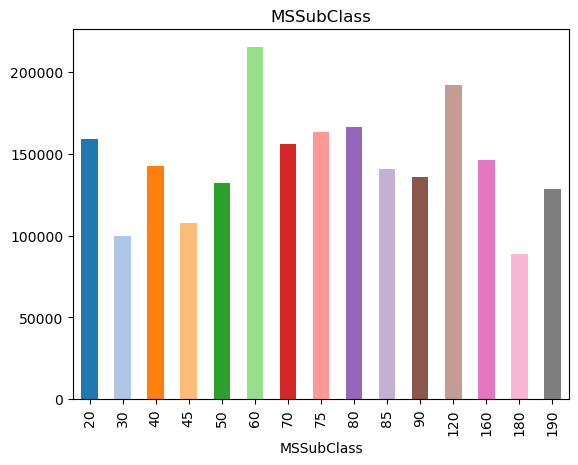

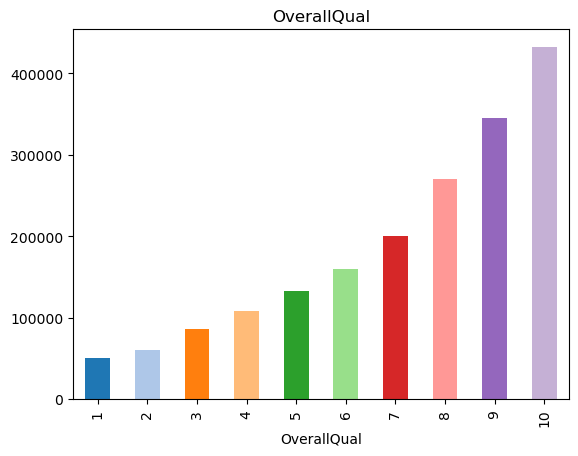

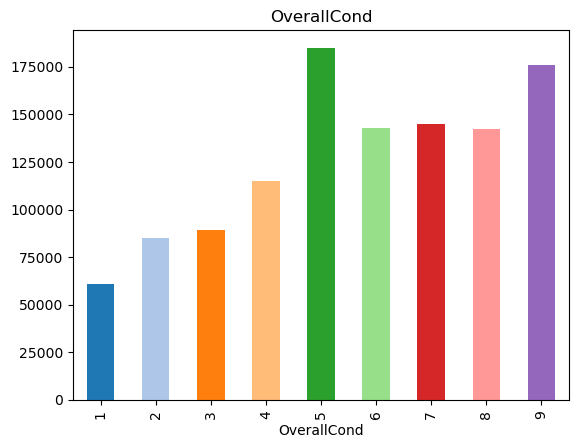

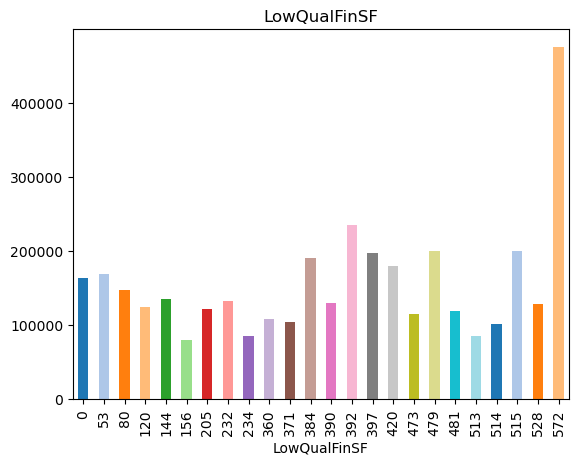

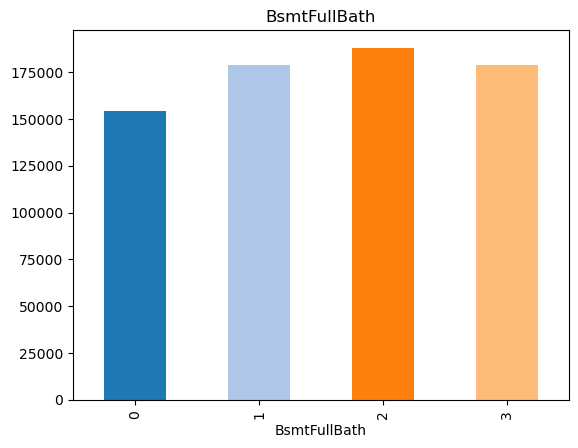

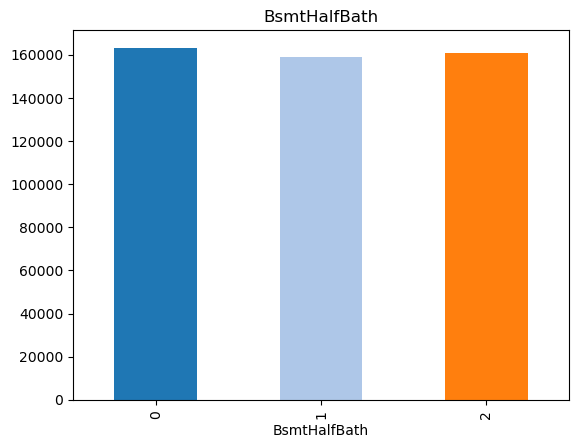

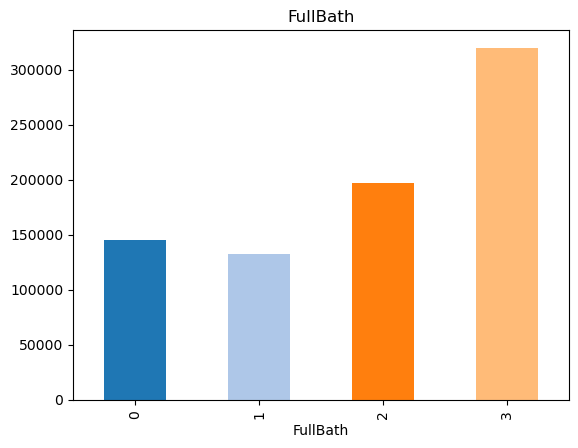

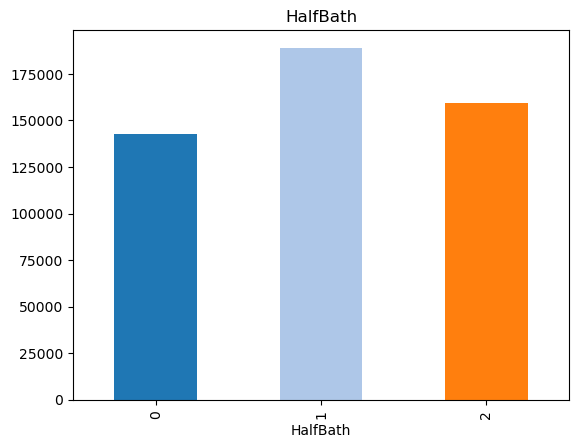

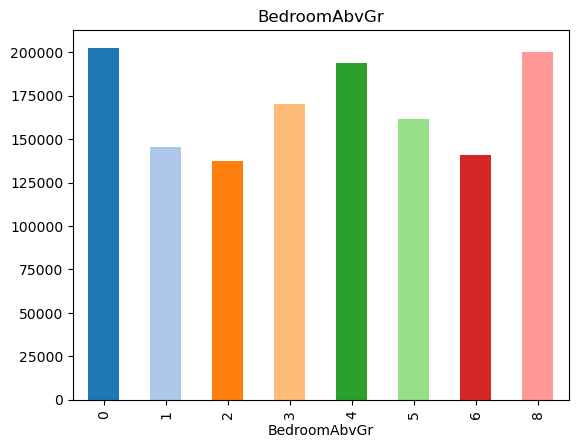

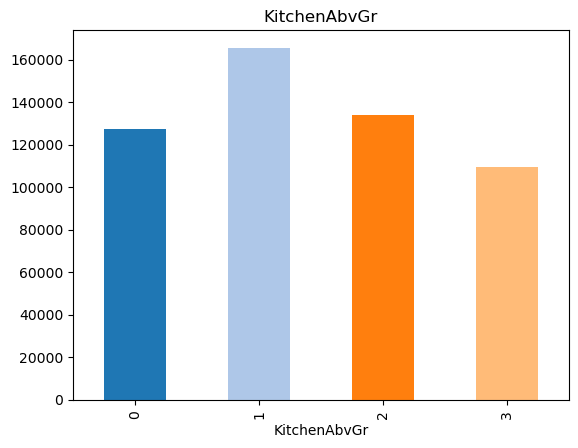

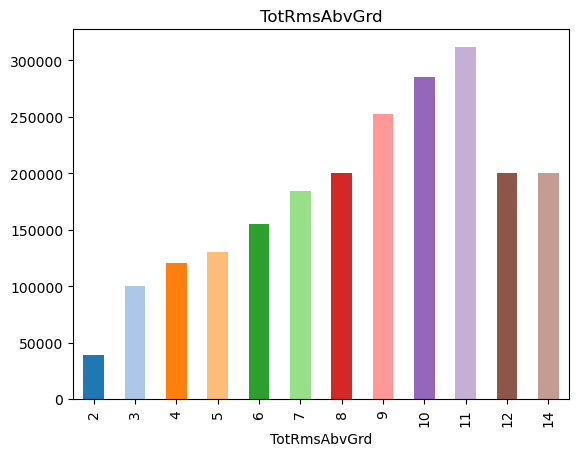

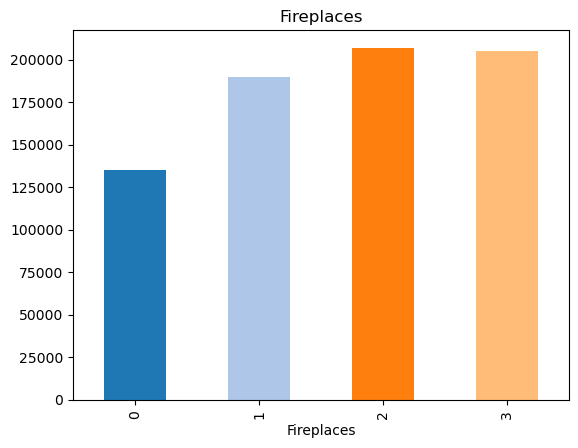

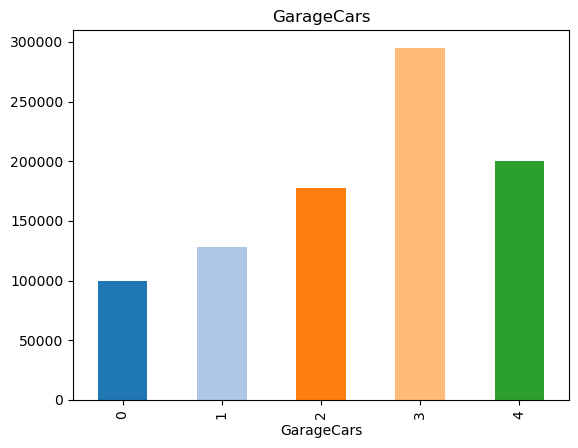

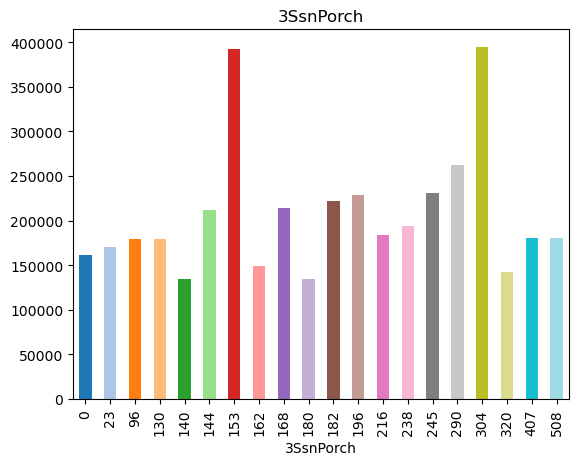

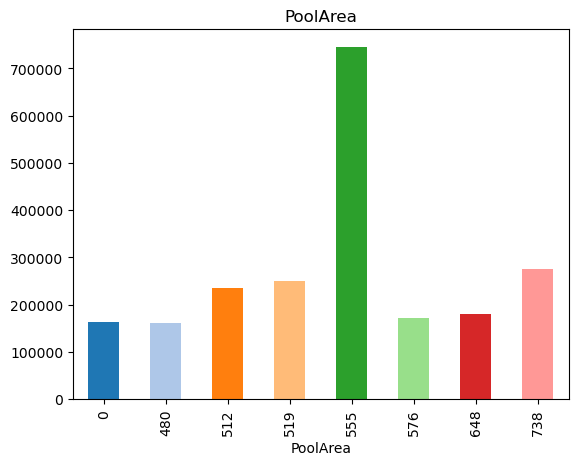

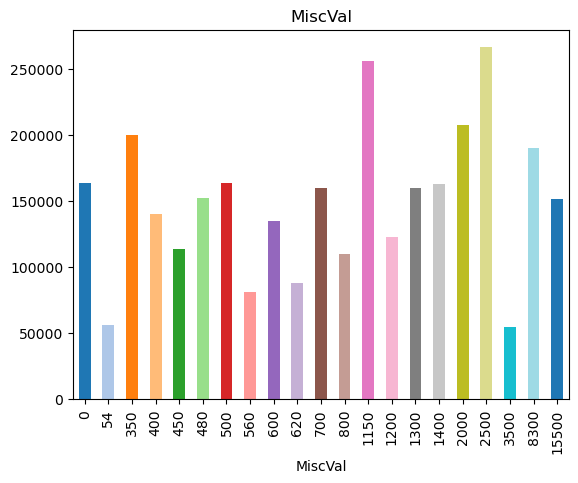

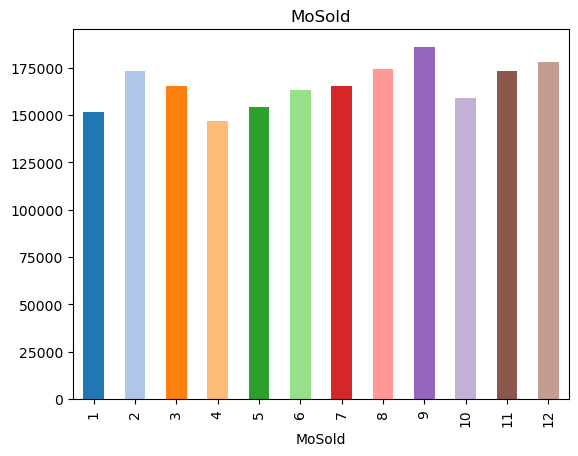

In [36]:
colors = plt.cm.tab20.colors
for col in disc_cols:
    data = df.copy()
    data.groupby(col)['SalePrice'].median().plot(kind='bar', color= colors)
    plt.title(col)
    plt.show()

#### As the overall quality and matrial of the house increases the median of sale price also increases. House with full bath have higher sale price

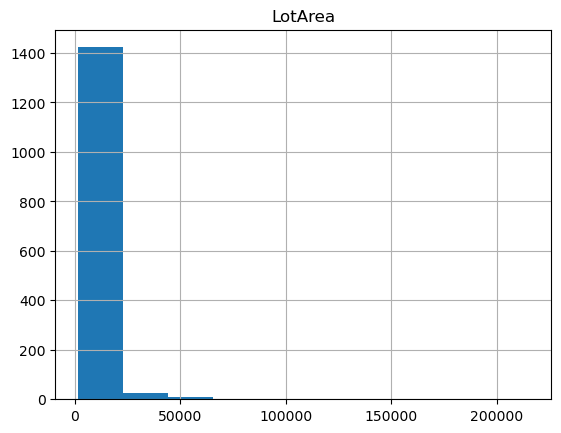

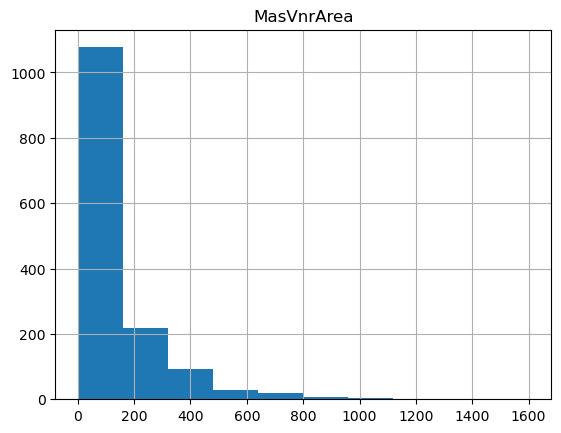

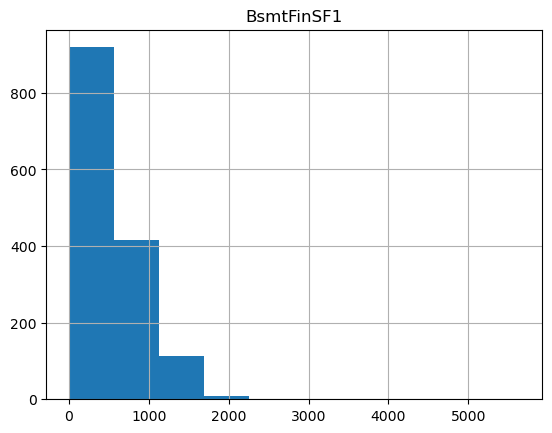

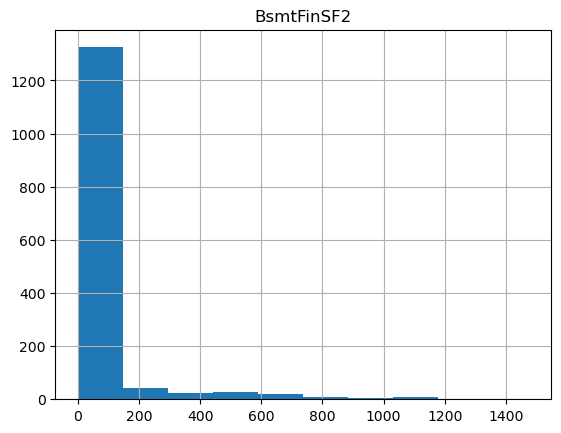

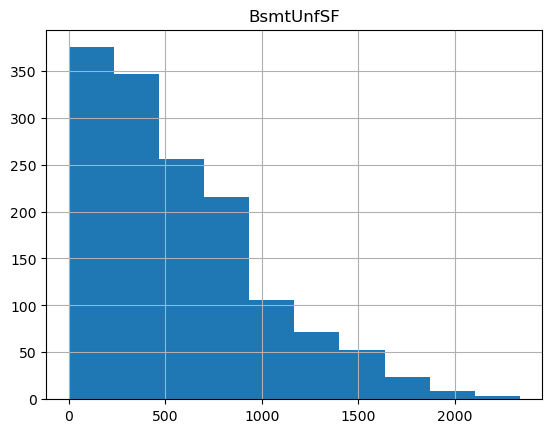

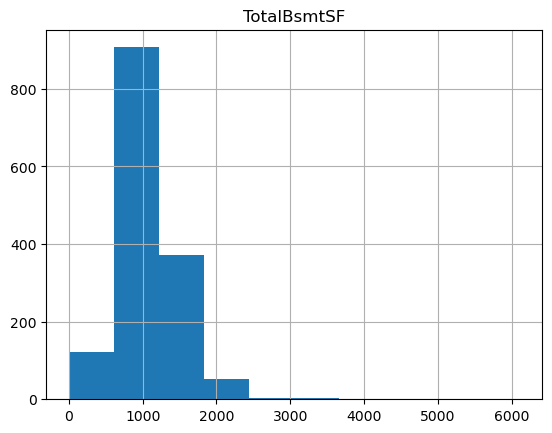

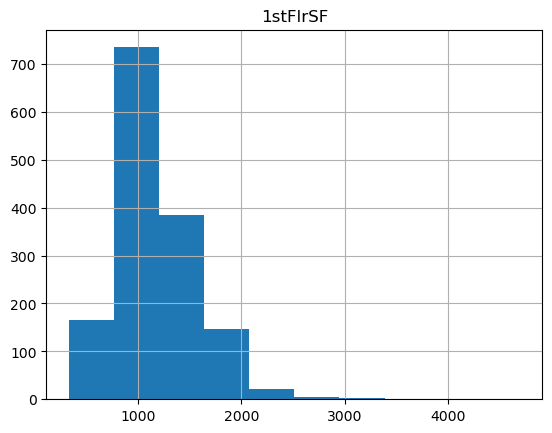

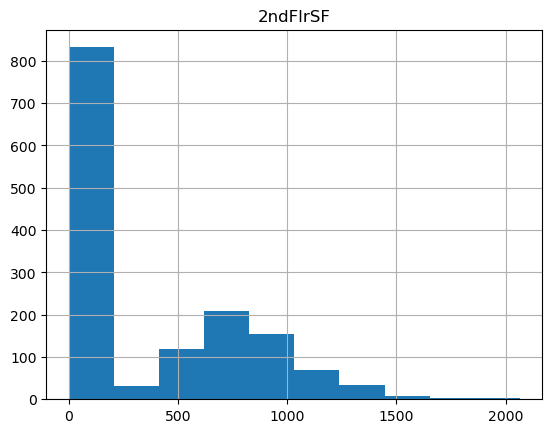

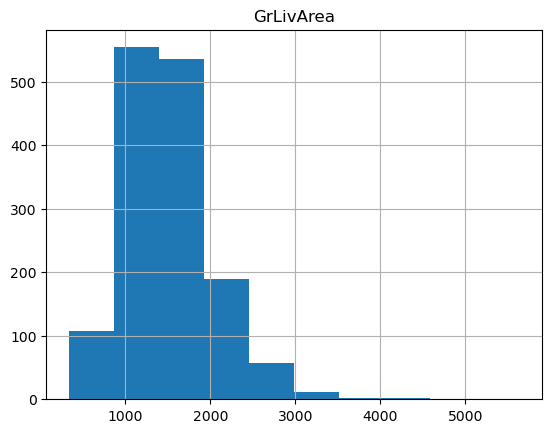

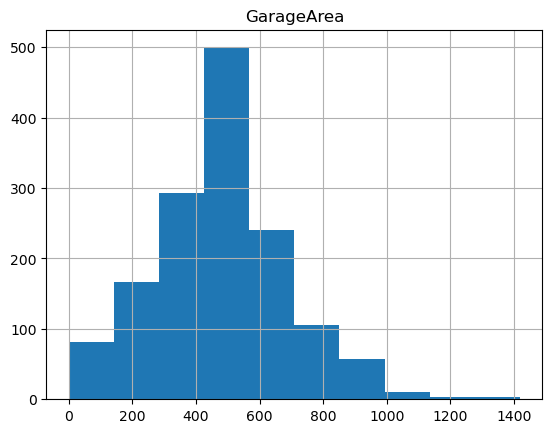

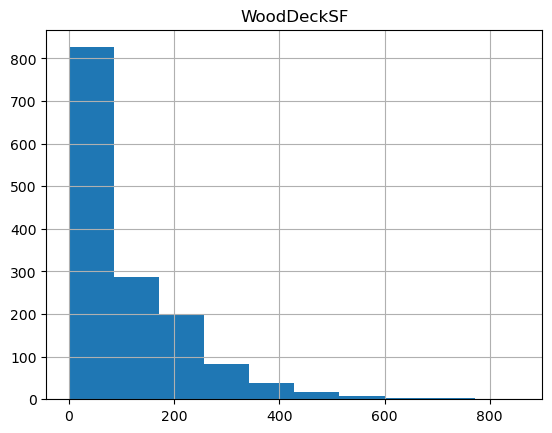

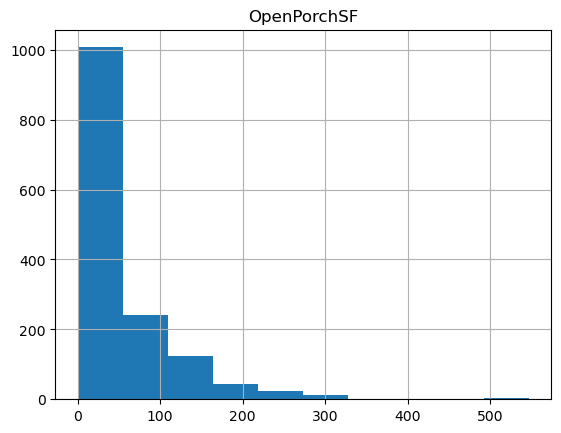

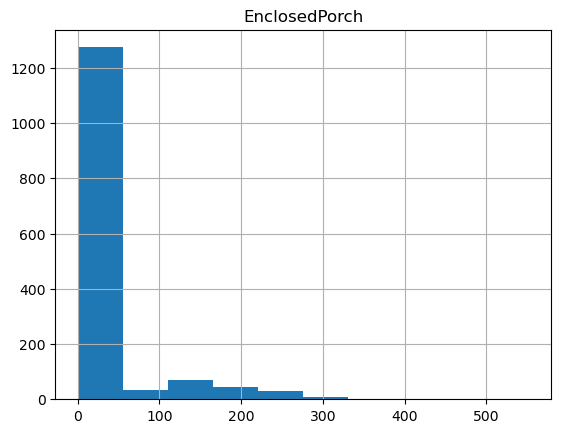

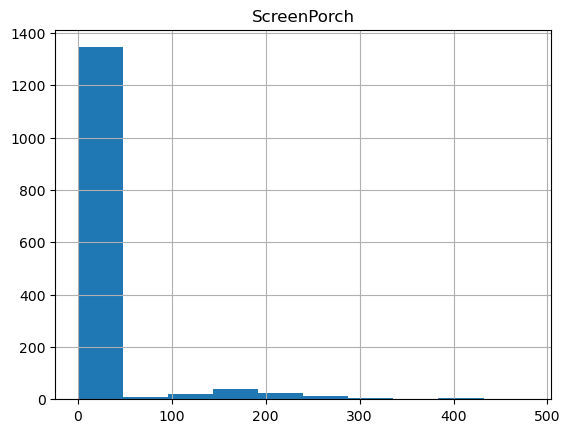

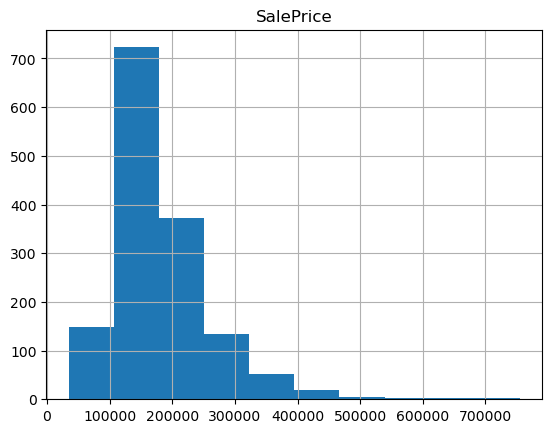

In [37]:
for col in cont_cols:
    data = df.copy()
    data[col].hist()
    plt.title(col)
    plt.show()

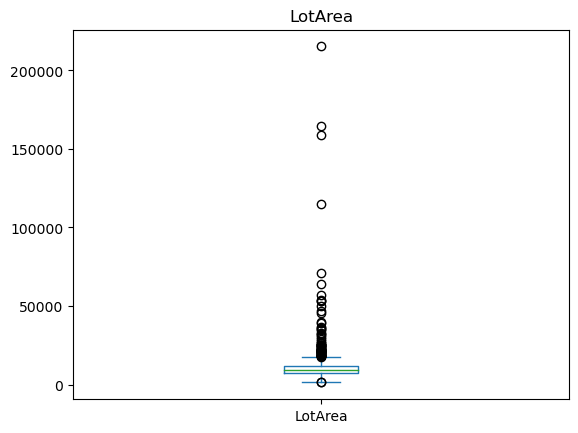

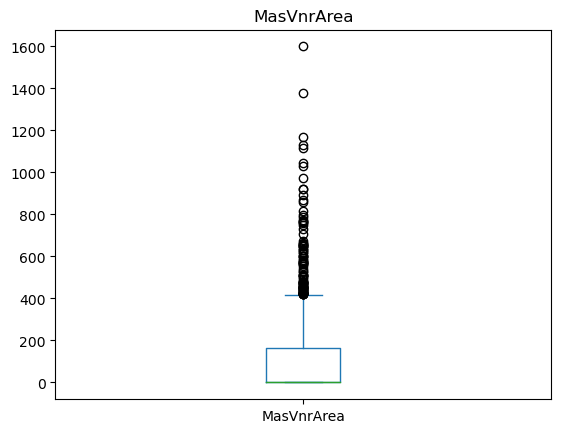

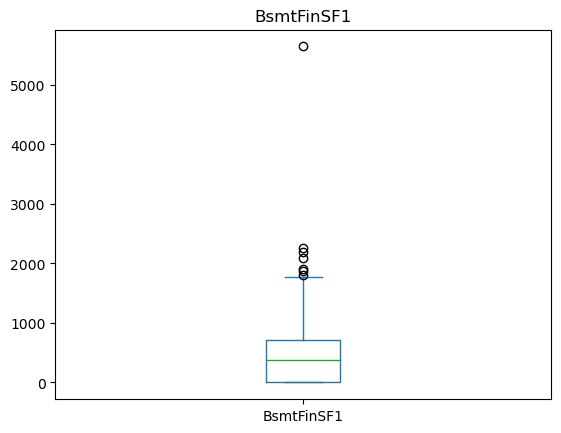

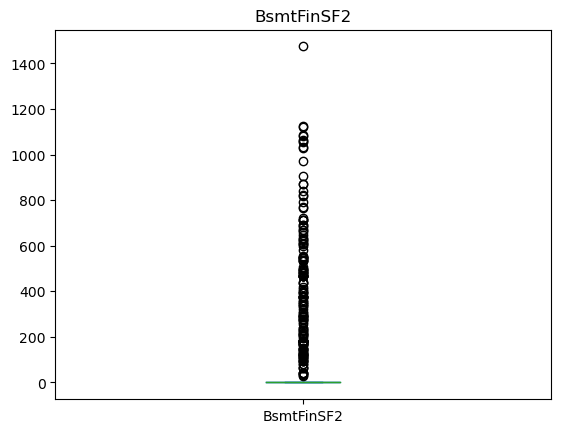

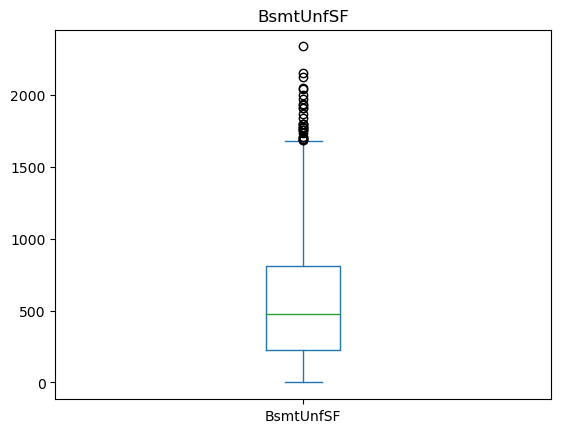

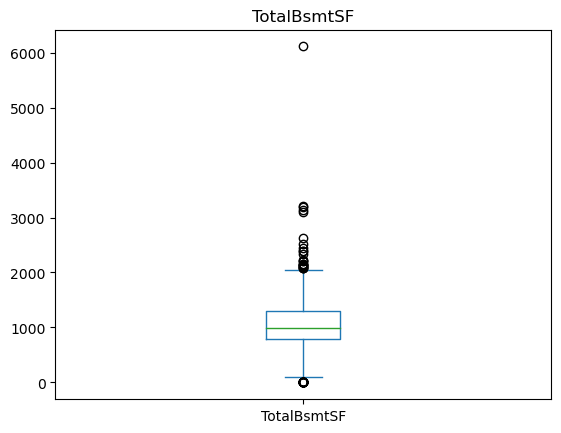

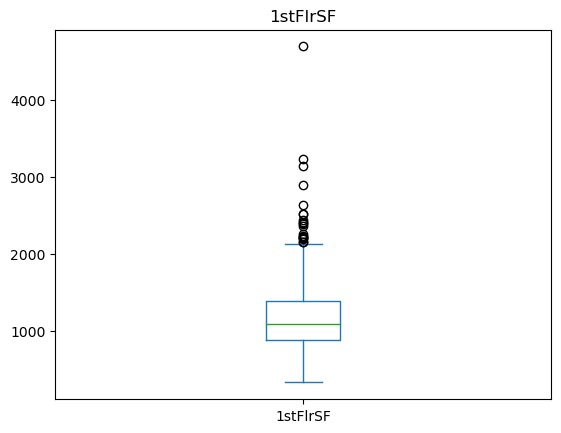

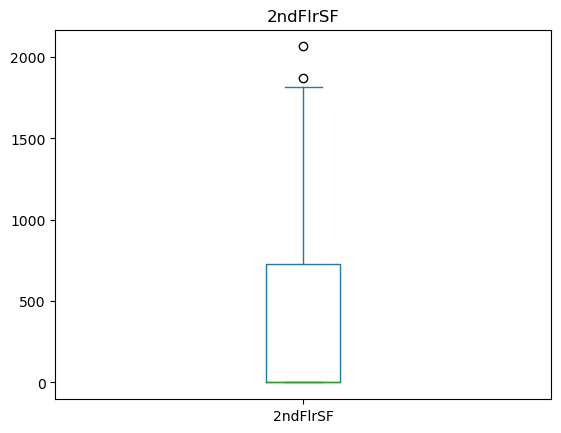

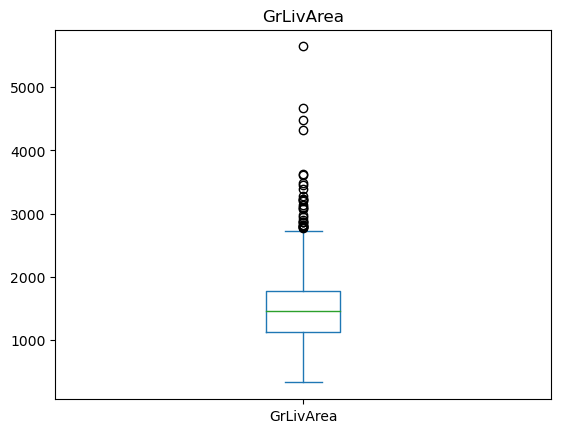

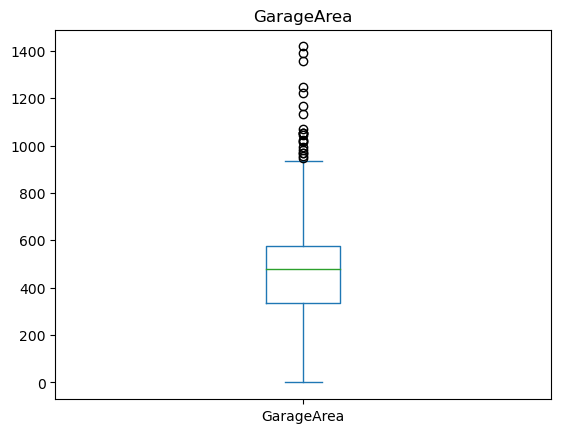

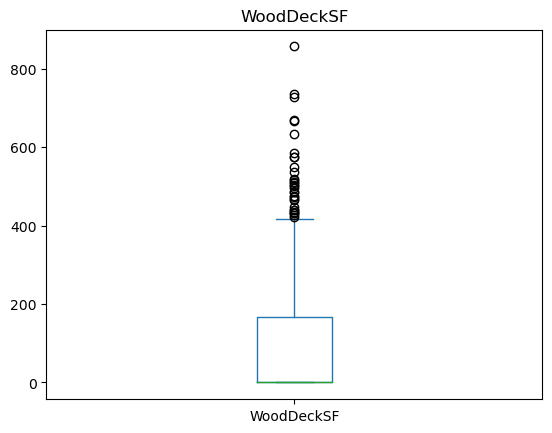

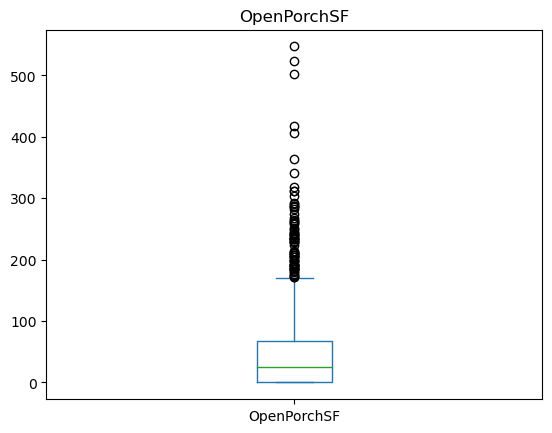

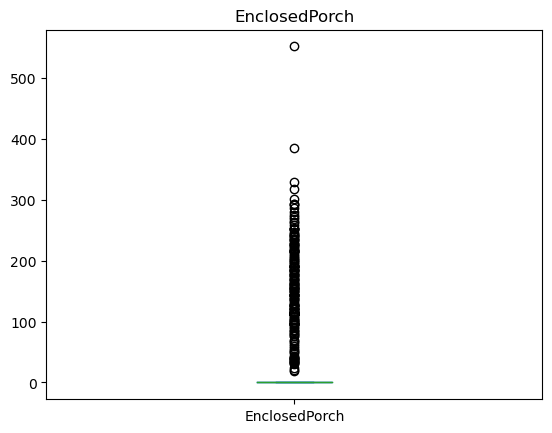

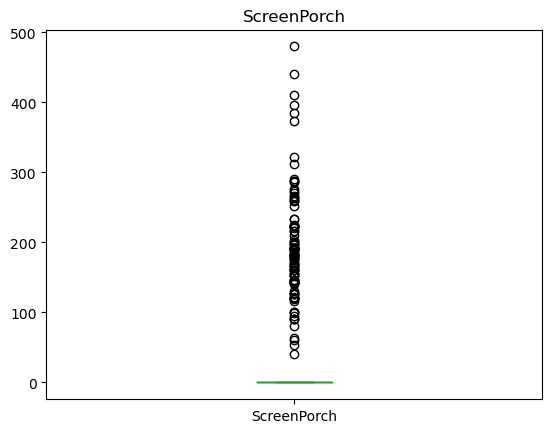

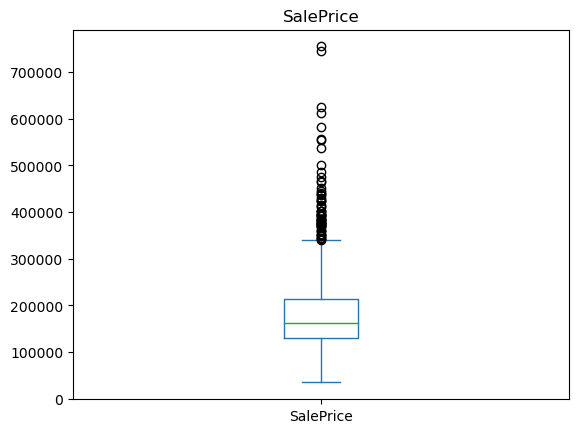

In [38]:
for col in cont_cols:
    data = df.copy()
    data[col].plot.box()
    plt.title(col)
    plt.show()

### We have performed a univarient analysis of the continuous values. Most of these values are right skewed. Apply a log transformation especially for the right skewed data to compress the high values and achieve slight normaity , this in turn reduces the outliers. Note that negative and 0 values do not have a logotithm

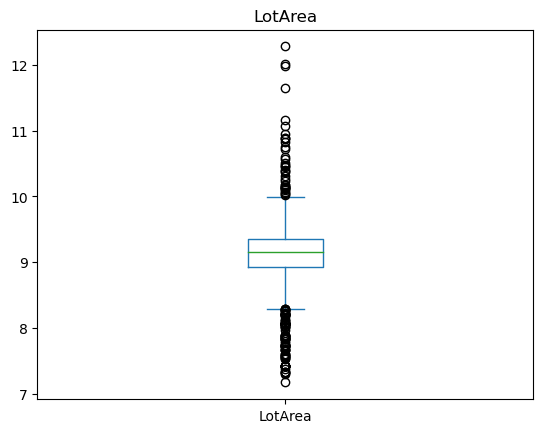

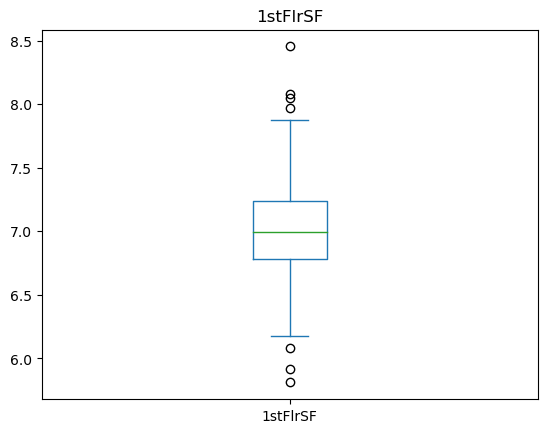

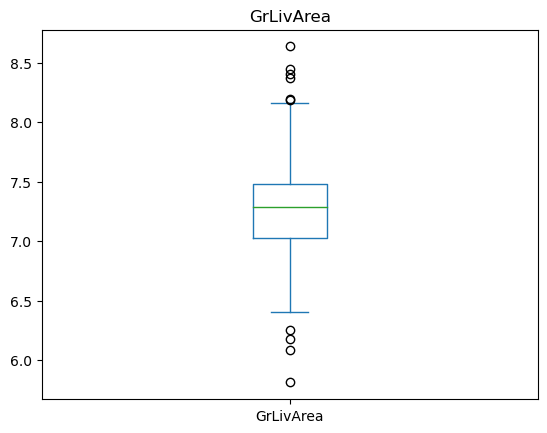

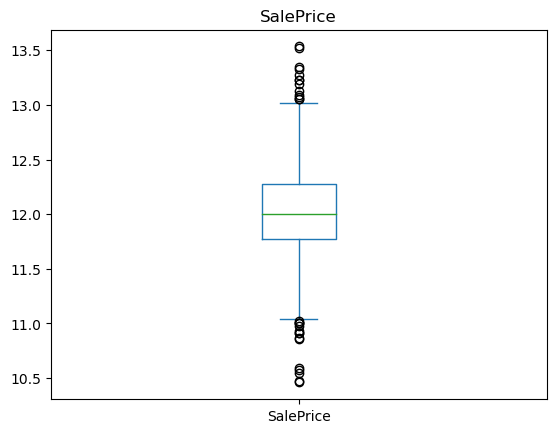

In [39]:
for col in cont_cols:
    data = df.copy()
    if 0 in data[col].unique(): ## to ignore all the columns that have 0 , log of 0 is undefined
        pass
    else:
        data[col] =np.log(data[col])
        data[col].plot.box()
        plt.title(col)
        plt.show()
        

### The plots look much better with the log transformation 

### Find the bivariate analysis for the continous numerical variables but ensure that the data is log transformed to see any correlation

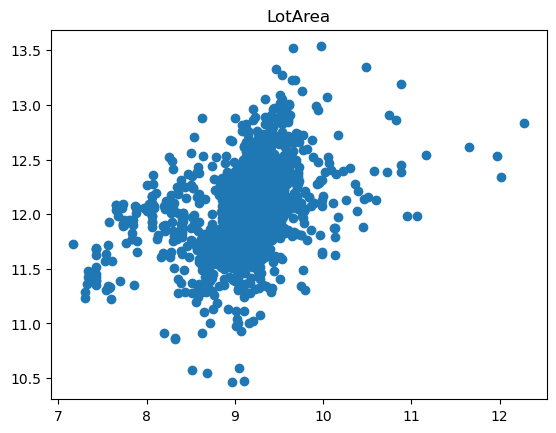

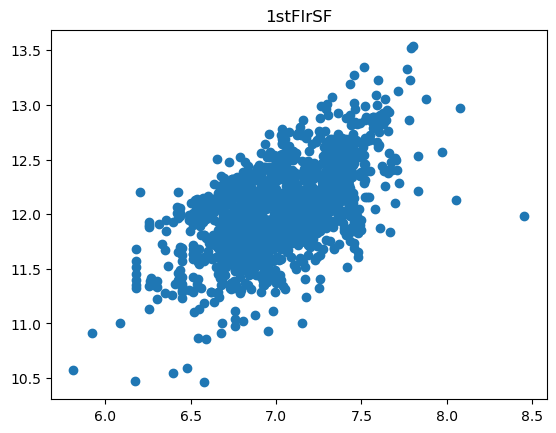

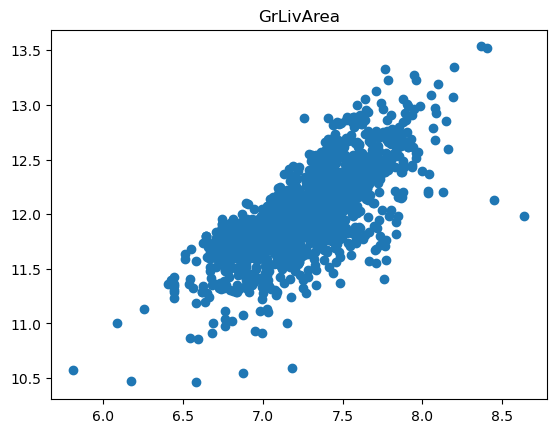

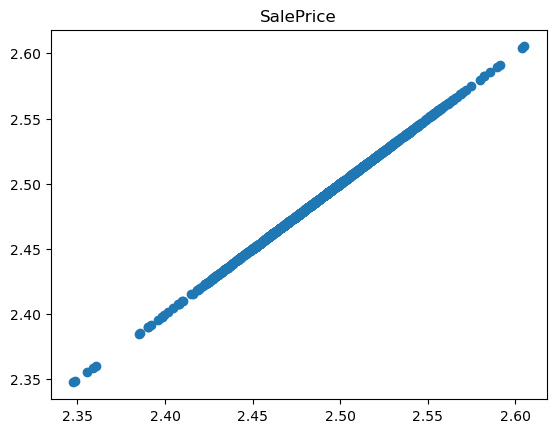

In [40]:
for col in cont_cols:
    data = df.copy()
    if 0 in data[col].unique(): ## to ignore all the columns that have 0 , log of 0 is undefined
        pass
    else:
        data[col] =np.log(data[col])
        data['SalePrice'] =np.log(data['SalePrice'])
        plt.scatter(x=data[col],y=data['SalePrice'])
        plt.title(col)
        plt.show()
        

#### ignore the sale price the correaltion for sale price vs sale price will be high. Notice that the rest of the plots have a positive correlation with the sale price.

# 2. Feature Engineering

## Handling Missing values

In [41]:
df_copy = df.copy()
df_copy.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [42]:
## Missing values for categorical values
na_cols =[]
for col in df_copy.columns:
    if df[col].isnull().sum()>0:
        na_cols.append(col)
        print(f"{col}.......{df[col].isnull().sum()}")

LotFrontage.......259
Alley.......1369
MasVnrType.......872
MasVnrArea.......8
BsmtQual.......37
BsmtCond.......37
BsmtExposure.......38
BsmtFinType1.......37
BsmtFinType2.......38
Electrical.......1
FireplaceQu.......690
GarageType.......81
GarageYrBlt.......81
GarageFinish.......81
GarageQual.......81
GarageCond.......81
PoolQC.......1453
Fence.......1179
MiscFeature.......1406


In [43]:
#for categorical values
cat_cols =[]
num_cols =[]
for col in na_cols:
    if df_copy[col].dtype == 'O':
        cat_cols.append(col)
    else:
        num_cols.append(col)
        

In [44]:
for col in cat_cols:
        df_copy[col].fillna("Missing", inplace=True)

In [45]:
## for numerical values, these are continuous values  so find the median and replace the na values, but keep track of the missing values as well

for feature in num_cols:
    median = df_copy[feature].median()
    df_copy[feature+'nan']= np.where(df_copy[feature].isnull(), 1, 0)# adding the nan column to keep track of the nan values of each feature
    df_copy[feature].fillna(median, inplace=True)

In [46]:
cont_cols

['LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch',
 'SalePrice']

In [47]:
##perform the log transformation on the continuous data, exclude the columns which have 0. From our previous EDA we know that
##these are the columns which need log transformation
log_cols =['LotArea', '1stFlrSF', 'GrLivArea', 'SalePrice']
for col in log_cols:
    df_copy[col]= np.log(df_copy[col])

In [48]:
df_copy.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontagenan,MasVnrAreanan,GarageYrBltnan
0,1,60,RL,65.0,9.041922,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,6.752270,854,0,7.444249,1,0,2,1,3,1,Gd,8,Typ,0,Missing,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,Missing,Missing,Missing,0,2,2008,WD,Normal,12.247694,0,0,0
1,2,20,RL,80.0,9.169518,Pave,Missing,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,Missing,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,7.140453,0,0,7.140453,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,Missing,Missing,Missing,0,5,2007,WD,Normal,12.109011,0,0,0
2,3,60,RL,68.0,9.328123,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,6.824374,866,0,7.487734,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,Missing,Missing,Missing,0,9,2008,WD,Normal,12.317167,0,0,0
3,4,70,RL,60.0,9.164296,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,Missing,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,6.867974,756,0,7.448334,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,Missing,Missing,Missing,0,2,2006,WD,Abnorml,11.849398,0,0,0
4,5,60,RL,84.0,9.565214,Pave,Missing,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,7.043160,1053,0,7.695303,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,Missing,Missing,Missing,0,12,2008,WD,Normal,12.429216,0,0,0


In [49]:
##convert the categorical values to dummy variables
cat_variables

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [50]:
for col in cat_variables:
    list_ord = df_copy.groupby(col)['SalePrice'].median().sort_values().index.tolist()
    # The sub-categories of the main category are grouped by and order based on the SalePrice
    #the index values are the sub-group names
    map_order = {key:ind for ind,key in enumerate(list_ord)}
    df_copy[col] = df_copy[col].map(map_order)

In [51]:
df_copy.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontagenan,MasVnrAreanan,GarageYrBltnan
0,1,60,3,65.0,9.041922,1,1,0,1,1,0,0,16,3,4,3,6,7,5,2003,2003,1,2,11,13,2,196.0,2,4,5,3,3,1,6,706,4,0,150,856,5,4,1,5,6.752270,854,0,7.444249,1,0,2,1,3,1,2,8,6,0,1,5,2003.0,2,2,548,4,5,2,0,61,0,0,0,0,0,4,2,0,2,2008,5,4,12.247694,0,0,0
1,2,20,3,80.0,9.169518,1,1,0,1,1,2,0,19,1,4,3,4,6,8,1976,1976,1,2,6,4,1,0.0,1,4,3,3,3,4,4,978,4,0,284,1262,5,4,1,5,7.140453,0,0,7.140453,0,1,2,0,3,1,1,6,6,1,3,5,1976.0,2,2,460,4,5,2,298,0,0,0,0,0,0,4,2,0,5,2007,5,4,12.109011,0,0,0
2,3,60,3,68.0,9.328123,1,1,1,1,1,0,0,16,3,4,3,6,7,5,2001,2002,1,2,11,13,2,162.0,2,4,5,3,3,2,6,486,4,0,434,920,5,4,1,5,6.824374,866,0,7.487734,1,0,2,1,3,1,2,6,6,1,3,5,2001.0,2,2,608,4,5,2,0,42,0,0,0,0,0,4,2,0,9,2008,5,4,12.317167,0,0,0
3,4,70,3,60.0,9.164296,1,1,1,1,1,1,0,18,3,4,3,6,7,5,1915,1970,1,2,5,3,1,0.0,1,4,1,2,4,1,4,216,4,0,540,756,5,3,1,5,6.867974,756,0,7.448334,1,0,1,0,3,1,2,7,6,1,4,2,1998.0,1,3,642,4,5,2,0,35,272,0,0,0,0,4,2,0,2,2006,5,1,11.849398,0,0,0
4,5,60,3,84.0,9.565214,1,1,1,1,1,2,0,23,3,4,3,6,8,5,2000,2000,1,2,11,13,2,350.0,2,4,5,3,3,3,6,655,4,0,490,1145,5,4,1,5,7.043160,1053,0,7.695303,1,0,2,1,4,1,2,9,6,1,3,5,2000.0,2,3,836,4,5,2,192,84,0,0,0,0,0,4,2,0,12,2008,5,4,12.429216,0,0,0


In [52]:
##apply the scaling for all the colums except foe ID and SalePrice, SalePrice is our dependent varibale and ID is not needed to scale
scale_cols = [col for col in df_copy.columns if col not in ['Id', 'SalePrice']]
scale_cols

['MSSubClass',
 'MSZoning',
 'LotFrontage',
 'LotArea',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF',
 'Enc

In [53]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
scale.fit(df_copy[scale_cols])

MinMaxScaler()

In [54]:
scale.transform(df_copy[scale_cols])

array([[0.23529412, 0.75      , 0.15068493, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.75      , 0.20205479, ..., 0.        , 0.        ,
        0.        ],
       [0.23529412, 0.75      , 0.1609589 , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.29411765, 0.75      , 0.15410959, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.75      , 0.1609589 , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.75      , 0.18493151, ..., 0.        , 0.        ,
        0.        ]])

In [55]:
scaled_data = pd.DataFrame(scale.transform(df_copy[scale_cols]), columns=scale_cols)
scaled_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontagenan,MasVnrAreanan,GarageYrBltnan
0,0.235294,0.75,0.150685,0.366344,1.0,0.5,0.000000,0.333333,1.0,0.00,0.0,0.666667,0.375,0.571429,0.75,0.857143,0.666667,0.500,0.949275,0.883333,0.2,0.285714,0.785714,0.866667,0.666667,0.12250,0.666667,1.0,1.0,0.75,0.75,0.25,1.000000,0.125089,0.666667,0.0,0.064212,0.140098,1.0,1.00,1.0,1.0,0.356155,0.413559,0.0,0.577712,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.666667,0.500000,1.0,0.000000,0.2,0.833333,0.936364,0.666667,0.50,0.386460,0.8,1.0,1.0,0.000000,0.111517,0.000000,0.0,0.0,0.0,0.0,1.0,0.5,0.0,0.090909,0.50,0.625,0.8,0.0,0.0,0.0
1,0.000000,0.75,0.202055,0.391317,1.0,0.5,0.000000,0.333333,1.0,0.50,0.0,0.791667,0.125,0.571429,0.75,0.571429,0.555556,0.875,0.753623,0.433333,0.2,0.285714,0.428571,0.266667,0.333333,0.00000,0.333333,1.0,0.6,0.75,0.75,1.00,0.666667,0.173281,0.666667,0.0,0.121575,0.206547,1.0,1.00,1.0,1.0,0.503056,0.000000,0.0,0.470245,0.000000,0.5,0.666667,0.0,0.375,0.333333,0.333333,0.333333,1.0,0.333333,0.6,0.833333,0.690909,0.666667,0.50,0.324401,0.8,1.0,1.0,0.347725,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0,0.5,0.0,0.363636,0.25,0.625,0.8,0.0,0.0,0.0
2,0.235294,0.75,0.160959,0.422359,1.0,0.5,0.333333,0.333333,1.0,0.00,0.0,0.666667,0.375,0.571429,0.75,0.857143,0.666667,0.500,0.934783,0.866667,0.2,0.285714,0.785714,0.866667,0.666667,0.10125,0.666667,1.0,1.0,0.75,0.75,0.50,1.000000,0.086109,0.666667,0.0,0.185788,0.150573,1.0,1.00,1.0,1.0,0.383441,0.419370,0.0,0.593095,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.666667,0.333333,1.0,0.333333,0.6,0.833333,0.918182,0.666667,0.50,0.428773,0.8,1.0,1.0,0.000000,0.076782,0.000000,0.0,0.0,0.0,0.0,1.0,0.5,0.0,0.727273,0.50,0.625,0.8,0.0,0.0,0.0
3,0.294118,0.75,0.133562,0.390295,1.0,0.5,0.333333,0.333333,1.0,0.25,0.0,0.750000,0.375,0.571429,0.75,0.857143,0.666667,0.500,0.311594,0.333333,0.2,0.285714,0.357143,0.200000,0.333333,0.00000,0.333333,1.0,0.2,0.50,1.00,0.25,0.666667,0.038271,0.666667,0.0,0.231164,0.123732,1.0,0.75,1.0,1.0,0.399941,0.366102,0.0,0.579157,0.333333,0.0,0.333333,0.0,0.375,0.333333,0.666667,0.416667,1.0,0.333333,0.8,0.333333,0.890909,0.333333,0.75,0.452750,0.8,1.0,1.0,0.000000,0.063985,0.492754,0.0,0.0,0.0,0.0,1.0,0.5,0.0,0.090909,0.00,0.625,0.2,0.0,0.0,0.0
4,0.235294,0.75,0.215753,0.468761,1.0,0.5,0.333333,0.333333,1.0,0.50,0.0,0.958333,0.375,0.571429,0.75,0.857143,0.777778,0.500,0.927536,0.833333,0.2,0.285714,0.785714,0.866667,0.666667,0.21875,0.666667,1.0,1.0,0.75,0.75,0.75,1.000000,0.116052,0.666667,0.0,0.209760,0.187398,1.0,1.00,1.0,1.0,0.466237,0.509927,0.0,0.666523,0.333333,0.0,0.666667,0.5,0.500,0.333333,0.666667,0.583333,1.0,0.333333,0.6,0.833333,0.909091,0.666667,0.75,0.589563,0.8,1.0,1.0,0.224037,0.153565,0.000000,0.0,0.0,0.0,0.0,1.0,0.5,0.0,1.000000,0.50,0.625,0.8,0.0,0.0,0.0


In [56]:
##combine the id and the sale price
final_data = pd.concat([df_copy[['Id','SalePrice']], scaled_data], axis =1)
final_data.head()

,Id,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontagenan,MasVnrAreanan,GarageYrBltnan
0,1,12.247694,0.235294,0.75,0.150685,0.366344,1.0,0.5,0.000000,0.333333,1.0,0.00,0.0,0.666667,0.375,0.571429,0.75,0.857143,0.666667,0.500,0.949275,0.883333,0.2,0.285714,0.785714,0.866667,0.666667,0.12250,0.666667,1.0,1.0,0.75,0.75,0.25,1.000000,0.125089,0.666667,0.0,0.064212,0.140098,1.0,1.00,1.0,1.0,0.356155,0.413559,0.0,0.577712,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.666667,0.500000,1.0,0.000000,0.2,0.833333,0.936364,0.666667,0.50,0.386460,0.8,1.0,1.0,0.000000,0.111517,0.000000,0.0,0.0,0.0,0.0,1.0,0.5,0.0,0.090909,0.50,0.625,0.8,0.0,0.0,0.0
1,2,12.109011,0.000000,0.75,0.202055,0.391317,1.0,0.5,0.000000,0.333333,1.0,0.50,0.0,0.791667,0.125,0.571429,0.75,0.571429,0.555556,0.875,0.753623,0.433333,0.2,0.285714,0.428571,0.266667,0.333333,0.00000,0.333333,1.0,0.6,0.75,0.75,1.00,0.666667,0.173281,0.666667,0.0,0.121575,0.206547,1.0,1.00,1.0,1.0,0.503056,0.000000,0.0,0.470245,0.000000,0.5,0.666667,0.0,0.375,0.333333,0.333333,0.333333,1.0,0.333333,0.6,0.833333,0.690909,0.666667,0.50,0.324401,0.8,1.0,1.0,0.347725,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0,0.5,0.0,0.363636,0.25,0.625,0.8,0.0,0.0,0.0
2,3,12.317167,0.235294,0.75,0.160959,0.422359,1.0,0.5,0.333333,0.333333,1.0,0.00,0.0,0.666667,0.375,0.571429,0.75,0.857143,0.666667,0.500,0.934783,0.866667,0.2,0.285714,0.785714,0.866667,0.666667,0.10125,0.666667,1.0,1.0,0.75,0.75,0.50,1.000000,0.086109,0.666667,0.0,0.185788,0.150573,1.0,1.00,1.0,1.0,0.383441,0.419370,0.0,0.593095,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.666667,0.333333,1.0,0.333333,0.6,0.833333,0.918182,0.666667,0.50,0.428773,0.8,1.0,1.0,0.000000,0.076782,0.000000,0.0,0.0,0.0,0.0,1.0,0.5,0.0,0.727273,0.50,0.625,0.8,0.0,0.0,0.0
3,4,11.849398,0.294118,0.75,0.133562,0.390295,1.0,0.5,0.333333,0.333333,1.0,0.25,0.0,0.750000,0.375,0.571429,0.75,0.857143,0.666667,0.500,0.311594,0.333333,0.2,0.285714,0.357143,0.200000,0.333333,0.00000,0.333333,1.0,0.2,0.50,1.00,0.25,0.666667,0.038271,0.666667,0.0,0.231164,0.123732,1.0,0.75,1.0,1.0,0.399941,0.366102,0.0,0.579157,0.333333,0.0,0.333333,0.0,0.375,0.333333,0.666667,0.416667,1.0,0.333333,0.8,0.333333,0.890909,0.333333,0.75,0.452750,0.8,1.0,1.0,0.000000,0.063985,0.492754,0.0,0.0,0.0,0.0,1.0,0.5,0.0,0.090909,0.00,0.625,0.2,0.0,0.0,0.0
4,5,12.429216,0.235294,0.75,0.215753,0.468761,1.0,0.5,0.333333,0.333333,1.0,0.50,0.0,0.958333,0.375,0.571429,0.75,0.857143,0.777778,0.500,0.927536,0.833333,0.2,0.285714,0.785714,0.866667,0.666667,0.21875,0.666667,1.0,1.0,0.75,0.75,0.75,1.000000,0.116052,0.666667,0.0,0.209760,0.187398,1.0,1.00,1.0,1.0,0.466237,0.509927,0.0,0.666523,0.333333,0.0,0.666667,0.5,0.500,0.333333,0.666667,0.583333,1.0,0.333333,0.6,0.833333,0.909091,0.666667,0.75,0.589563,0.8,1.0,1.0,0.224037,0.153565,0.000000,0.0,0.0,0.0,0.0,1.0,0.5,0.0,1.000000,0.50,0.625,0.8,0.0,0.0,0.0


# 3.Model Training

In [95]:
x = final_data.iloc[:,2:]
y = final_data['SalePrice'].to_frame()

x_train, x_test , y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [96]:
lr = LinearRegression() 
lr.fit(x_train, y_train)

LinearRegression()

In [98]:
y_pred = lr.predict(x_test)


In [102]:
r2 = r2_score(y_test, y_pred)
print("R² Score:", r2)

# Other useful metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("MAE:", mae)
print("RMSE:", rmse)

R² Score: 0.9064945205122464
MAE: 0.09106616497685478
RMSE: 0.132096125994164


# 4. Feature Selection

### There are about 81 columns present in the data frame , surely not all the columns will be contributing to predict the Sales price of a house. In order to find the columns which contribute the most to predict the dependent varible we will be using the Lasso

In [103]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [104]:
y = final_data[['SalePrice']]
x = final_data.drop(['Id','SalePrice'], axis =1)

In [105]:
feature_sel = SelectFromModel(Lasso(alpha=0.005, random_state=0))
feature_sel.fit(x, y)

SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))

In [106]:
feature_sel.get_support()

array([ True, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False,  True, False,
       False,  True, False, False, False, False, False, False, False,
       False, False,  True, False,  True, False, False, False, False,
       False, False, False,  True,  True, False,  True, False, False,
        True,  True, False, False, False, False, False,  True, False,
       False,  True,  True,  True, False,  True,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False])

In [107]:
selected_fet = x.columns[(feature_sel.get_support())]
selected_fet

Index(['MSSubClass', 'Neighborhood', 'OverallQual', 'YearRemodAdd', 'BsmtQual',
       'BsmtExposure', 'HeatingQC', 'CentralAir', '1stFlrSF', 'GrLivArea',
       'BsmtFullBath', 'KitchenQual', 'Fireplaces', 'FireplaceQu',
       'GarageType', 'GarageFinish', 'GarageCars'],
      dtype='object')

In [108]:
selected_fet.size

17

In [109]:
x[selected_fet].head()

,MSSubClass,Neighborhood,OverallQual,YearRemodAdd,BsmtQual,BsmtExposure,HeatingQC,CentralAir,1stFlrSF,GrLivArea,BsmtFullBath,KitchenQual,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars
0,0.235294,0.666667,0.666667,0.883333,0.75,0.25,1.00,1.0,0.356155,0.577712,0.333333,0.666667,0.000000,0.2,0.833333,0.666667,0.50
1,0.000000,0.791667,0.555556,0.433333,0.75,1.00,1.00,1.0,0.503056,0.470245,0.000000,0.333333,0.333333,0.6,0.833333,0.666667,0.50
2,0.235294,0.666667,0.666667,0.866667,0.75,0.50,1.00,1.0,0.383441,0.593095,0.333333,0.666667,0.333333,0.6,0.833333,0.666667,0.50
3,0.294118,0.750000,0.666667,0.333333,0.50,0.25,0.75,1.0,0.399941,0.579157,0.333333,0.666667,0.333333,0.8,0.333333,0.333333,0.75
4,0.235294,0.958333,0.777778,0.833333,0.75,0.75,1.00,1.0,0.466237,0.666523,0.333333,0.666667,0.333333,0.6,0.833333,0.666667,0.75


In [110]:
x_new = x[selected_fet].copy()

In [111]:
x_train , x_test , y_train, y_test = train_test_split(x_new,y, test_size=0.2, random_state=42)


In [113]:
lr2 = LinearRegression()
lr2.fit(x_train, y_train)
lr2.predict(x_test)

array([[11.75204495],
       [12.72164594],
       [11.66052622],
       [11.9485121 ],
       [12.72195254],
       [11.25093525],
       [12.32231864],
       [11.86973532],
       [11.23717913],
       [11.68122031],
       [11.89482284],
       [11.68787172],
       [11.46640123],
       [12.29656748],
       [12.110571  ],
       [11.80646845],
       [12.21853047],
       [11.77684901],
       [11.6243933 ],
       [12.31118401],
       [12.10674375],
       [12.2646896 ],
       [12.14915373],
       [11.76554111],
       [12.30062694],
       [11.9119844 ],
       [12.18103332],
       [11.60871955],
       [12.09524883],
       [12.19848983],
       [11.73325764],
       [12.5322171 ],
       [12.2282304 ],
       [11.56193065],
       [12.50674407],
       [11.88251373],
       [11.98195589],
       [12.30279539],
       [12.64723175],
       [11.42946835],
       [11.75349403],
       [12.37298277],
       [11.61181804],
       [12.64063118],
       [11.70408297],
       [11

In [114]:
r2 = r2_score(y_test, y_pred)
print("R² Score:", r2)

# Other useful metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("MAE:", mae)
print("RMSE:", rmse)

R² Score: 0.9064945205122464
MAE: 0.09106616497685478
RMSE: 0.132096125994164
